<a href="https://colab.research.google.com/github/Degles/challenger_alura_store_BR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


##1.1. Faturamento Global: **Valor total de vendas de todas as lojas**


In [2]:
# Configurando o Locale no Google Colab

!locale-gen pt_BR.UTF-8
!dpkg-reconfigure locales

# -------------------

from urllib.request import urlopen
import csv
import locale
import requests

try:
    locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
except locale.Error:
    print("Atenção: Não foi possível configurar o locale 'pt_BR.UTF-8'. Tentando 'pt_BR'...")
    try:
        locale.setlocale(locale.LC_ALL, 'pt_BR')
    except locale.Error:
        print("Atenção: Não foi possível configurar o locale 'pt_BR' também. A formatação de moeda pode não ser a esperada.")

# --- Definição das URLs dos arquivos CSV---

urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# --------------------------------------

# Função para ler CSV a partir da URL
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status()
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# Análise de faturamento
vendas_por_categoria = {} # dicionário que armazena vendas por categorias (total geral)
resumo_faturamento_por_loja = [] # lista para armazenar o faturamento de cada loja
faturamento_total = 0 # Inicialização do faturamento total global

print("Iniciando a análise de faturamento por loja...")
print("---")

for i, url in enumerate(urls):
    print(f"Processando Loja {i + 1} (URL: {url})...")
    dados_loja = ler_csv(url)
    categorias_loja = {}
    faturamento_loja = 0

    if not dados_loja:
        print(f"Nenhum dado encontrado para a loja {i + 1}. Pulando esta loja.")
        faturamento_loja_formatado =locale.currency(0.00, grouping=True, symbol=True)
        resumo_faturamento_por_loja.append(f"Loja_{i + 1} {faturamento_loja_formatado}")
        print("---")
        continue

# Loop que processa cada venda na loja atual
    for venda in dados_loja:
        try:
            categoria = venda['Categoria do Produto']
            preco = float(venda['Preço'])
            valor_venda = preco
            faturamento_loja += preco

            if categoria in categorias_loja:
                categorias_loja[categoria] += valor_venda
            else:
                categorias_loja[categoria] = valor_venda

            if categoria in vendas_por_categoria:
                vendas_por_categoria[categoria]+= valor_venda
            else:
                vendas_por_categoria[categoria] = valor_venda
        except KeyError as e:
            print(f"AVISO (Loja {i+1}): Coluna não encontrada ({e}). Venda: {venda}. Ignorando esta venda.")
        except ValueError as e:
            print(f"AVISO (Loja {i+1}): Erro de valor ({e}). Venda: {venda}. Ignorando esta venda.")

    faturamento_loja_formatado = locale.currency(faturamento_loja, grouping=True, symbol=True)
    resumo_faturamento_por_loja.append(f"Loja_{i + 1} {faturamento_loja_formatado}")
    faturamento_total += faturamento_loja
    print(f"\nVendas por categoria na Loja {i +1}:")
    for categoria, valor in categorias_loja.items():
        valor_por_categoria_formatado = locale.currency(valor, grouping=True, symbol=True)
        print(f" Venda da categoria {categoria}: {valor_por_categoria_formatado}")
    print("---")

# Total de vendas por lojas ---
total_loja_atual = sum(categorias_loja.values())
total_loja_atual_formatado = locale.currency(faturamento_loja, grouping=True, symbol=True)
print(f"Total de vendas na Loja {i + 1}: {total_loja_atual_formatado}")

# --- Mostrar resultados totais de categorias (fora do loop das lojas) ----
print("\n---")
print("Vendas totais por categorias (todas as lojas):")
for categoria, valor in vendas_por_categoria.items():
    valor_total_das_categorias_formatado = locale.currency(valor, grouping=True, symbol=True)
    print(f" Venda Total da Categoria {categoria}: {valor_total_das_categorias_formatado}")

# Calcular e formatar o total geral de vendas (soma das categorias)
total_geral_vendas_categorias = sum(vendas_por_categoria.values())
total_geral_vendas_categorias_formatado = locale.currency(total_geral_vendas_categorias, grouping=True, symbol=True)
print(f"\nTotal geral de vendas (soma das categorias): {total_geral_vendas_categorias_formatado}")

# Mostar faturamento total
faturamento_total_formatado = locale.currency(faturamento_total, grouping=True, symbol=True)
print(f"\nFaturamento total de totas as lojas:{faturamento_total_formatado}")

# Resumo faturamento total por lojas
print("\n" + "="*30) # linha de separação para o resumo
print("Resumo de Faturamento por Loja:")
print("Loja         Faturamento")
for item in resumo_faturamento_por_loja:
    print(item)
print("-"*30)
faturamento_total_global_resumo_formatado = locale.currency(faturamento_total, grouping=True, symbol=True)
print(f"Total Global: {faturamento_total_global_resumo_formatado}")
print("="*30)


Generating locales (this might take a while)...
  pt_BR.UTF-8... done
Generation complete.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.UTF-8... done
Generation complete.
Iniciando a análise de faturamento por loja...
---
Processando Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...

Vendas por categoria na Loja 1:
 Venda da categoria eletronicos: R$ 572.659,23
 Venda da categoria moveis: R$ 250.178,11
 Venda da categoria brinquedos: R$ 23.993,78
 Venda da categoria eletrodomesticos: R$ 484.913,36
 Venda da categoria utilidades domesticas: R$ 16.931,48
 Venda da categoria esporte e lazer: R$ 52.387,55
 Venda da categoria livros: R$ 11.713,92
 Venda da categoria instrumentos musicais: R$ 121.731,69
---
Processando Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...

Venda

As lojas apresentam faturamento global de R$ 5.871.490,79.


**Resumo de Faturamento por Loja:**

| Loja    | Faturamento|
|---------|---------------------|
| Loja_1  | 1.534.509,12     |
| Loja_2  | 1.488.459,06     |
| Loja_3  | 1.464.025,03     |
| Loja_4  | 1.384.497,58     |
| **Total Global** | **R$ 5.871.490,79** |



##1.2. Faturamento por Lojas: **Desempenho individual de cada unidade**

Calculando faturamento para visualização...
Loja 1 Faturamento: R$ 1.534.509,12
Loja 2 Faturamento: R$ 1.488.459,06
Loja 3 Faturamento: R$ 1.464.025,03
Loja 4 Faturamento: R$ 1.384.497,58

Gráfico 'faturamento_por_lojas_grafico.png' gerado com sucesso.


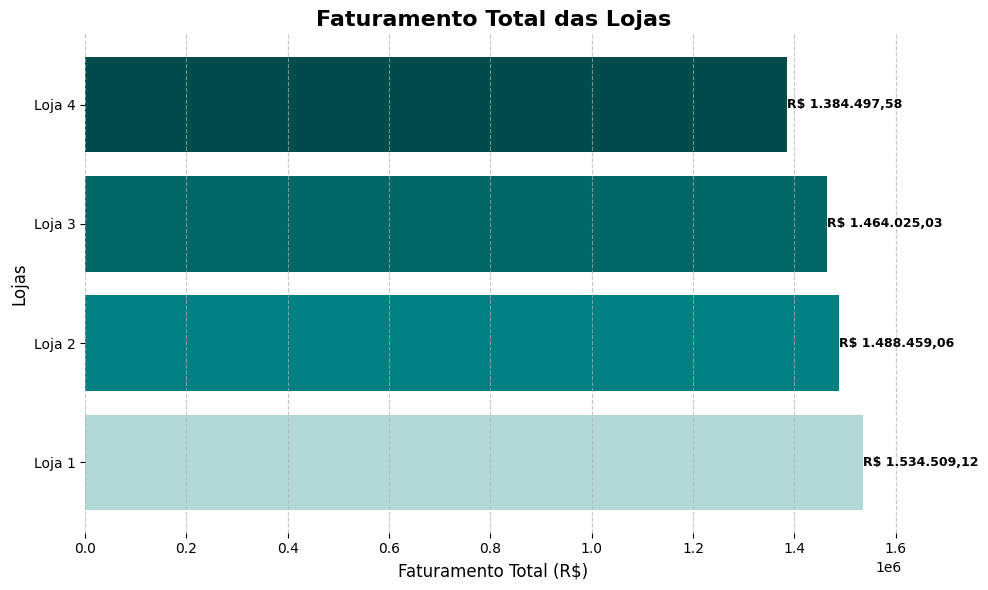

In [3]:
import locale
import csv
import requests
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    # f-string com :.2f para 2 casas decimais, depois substitui separadores
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------


# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# Plotando os dados
nomes_lojas = []
faturamentos_lojas = []
cores_barras = ['#b2d8d8', '#008080', '#006666', '#004c4c']

print("Calculando faturamento para visualização...")

for i, url in enumerate(urls):
    nome_loja = f"Loja {i + 1}"
    nomes_lojas.append(nome_loja)

    dados_loja = ler_csv(url)
    faturamento_loja = 0

    if not dados_loja:
        faturamentos_lojas.append(0)
        print(f"Nenhum dado encontrado para a {nome_loja}. Faturamento: {formatar_moeda_br(0)}.")
        continue

    for venda in dados_loja:
        try:
            preco = float(venda['Preço'])
            faturamento_loja += preco
        except KeyError as e: # Melhor tratamento: KeyError para chave não encontrada
            print(f"AVISO ({nome_loja}): Coluna 'Preço' não encontrada ({e}). Venda: {venda}. Ignorando esta venda.")
        except ValueError as e: # Tratamento para valores que não são números
            print(f"AVISO ({nome_loja}): Valor inválido em 'Preço' ({e}). Venda: {venda}. Ignorando esta venda.")

    faturamentos_lojas.append(faturamento_loja)
    print(f"{nome_loja} Faturamento: {formatar_moeda_br(faturamento_loja)}")


# Criando as barras do gráfico
plt.figure(figsize=(10, 6))
plt.barh(nomes_lojas, faturamentos_lojas, color=cores_barras)

# Removendo a borda do gráfico
ax = plt.gca() # Obtém o eixo atual (área de plotagem)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Adicionando títulos e categorias
plt.title('Faturamento Total das Lojas', fontsize=16, fontweight='bold')
plt.xlabel('Faturamento Total (R$)', fontsize=12)
plt.ylabel('Lojas', fontsize=12)

# Adicionando os valores às categorias no topo da barra
for faturamento_loja_valor, nome_loja in zip(faturamentos_lojas, nomes_lojas):
    plt.text(faturamento_loja_valor, nome_loja, formatar_moeda_br(faturamento_loja_valor), ha='left', va='center', fontsize=9, rotation=0, color='black', fontweight='bold')


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

# Salvando o gráfico
plt.savefig('faturamento_por_lojas_grafico.png')
print("\nGráfico 'faturamento_por_lojas_grafico.png' gerado com sucesso.")

# Mostrando o gráfico
plt.show()

##1.3. Faturamento por Categoria: **Faturamento por Categorias: Qual tipo de produto (ex: eletrônicos, móveis) gera mais receita.**


In [4]:
# Configurando o Locale no Google Colab
!locale-gen pt_BR.UTF-8
!dpkg-reconfigure locales

# -------------------

from urllib.request import urlopen
import csv
import locale

try:
    locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
except locale.Error:
    print("Atenção: Não foi possível configurar o locale 'pt_BR.UTF-8'. Tentando 'pt_BR'...")
    try:
        locale.setlocale(locale.LC_ALL, 'pt_BR')
    except locale.Error:
        print("Atenção: Não foi possível configurar o locale 'pt_BR' também. A formatação de moeda pode não ser a esperada.")

# --- Definição das URLs dos arquivos CSV---
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]
# --------------------------------------

# Função para ler CSV a partir da URL
def ler_csv(url):
    dados = []
    try:
        with urlopen(url) as resposta:
            linhas = resposta.read().decode('utf-8').splitlines()
            leitor = csv.DictReader(linhas)
            for linha in leitor:
                dados.append(linha)
    except Exception as e:
        print(f"Erro ao ler o CSV da URL {url}: {e}")
    return dados

# Dicionário para armazenar as Vendas por Categoria (TOTAL GERAL)
vendas_por_categoria = {}

print("Iniciando o processamento das vendas por categoria...")
print("---")

# Processar todas as lojas
for i, url in enumerate(urls):
    print(f"Processando Loja {i + 1} (URL: {url})...")
    dados_loja = ler_csv(url)

    # Dicionário para a loja atual (redefinido para cada nova loja)
    categorias_loja = {}

    if not dados_loja:
        print(f"Nenhum dado encontrado para a loja {i + 1}. Pulando esta loja.")
        print("---")
        continue

    # Loop para processar cada venda na loja atual
    for venda in dados_loja:
        try:
            # Garantir que as chaves existem e os valores podem ser convertidos
            categoria = venda['Categoria do Produto']
            preco = float(venda['Preço'])
            valor_venda = preco

            # Adicionar ao dicionário da loja atual
            if categoria in categorias_loja:
                categorias_loja[categoria] += valor_venda
            else:
                categorias_loja[categoria] = valor_venda

            # Adicionar ao dicionário geral (total de todas as lojas)
            if categoria in vendas_por_categoria:
                vendas_por_categoria[categoria] += valor_venda
            else:
                vendas_por_categoria[categoria] = valor_venda
        except KeyError as e:
            # Captura erros se uma chave como 'Preço' ou 'Categoria do Produto' não for encontrada
            print(f"AVISO (Loja {i+1}): Coluna não encontrada ({e}). Venda: {venda}. Ignorando esta venda.")
        except ValueError as e:
            # Captura erros se a conversão para float ou int falhar
            print(f"AVISO (Loja {i+1}): Erro de valor ({e}). Venda: {venda}. Ignorando esta venda.")


    print(f"\nVendas por categoria na Loja {i+1}:")
    for categoria, valor in categorias_loja.items():
        valor_por_categoria_formatado = locale.currency(valor, grouping=True, symbol=True)
        print(f"Venda da categoria {categoria}: {valor_por_categoria_formatado}")
    print("---")


# Mostrar resultados totais (fora do loop das lojas)
print("\n---")
print("Vendas totais por categoria (todas as lojas):")
for categoria, valor in vendas_por_categoria.items():
    valor_total_das_categorias_formatado = locale.currency(valor, grouping=True, symbol=True)
    print(f"Venda Total das Categorias  {categoria}: {valor_total_das_categorias_formatado}")

# Calcular o total geral
total_geral = sum(vendas_por_categoria.values())
total_geral_formatado = locale.currency(total_geral, grouping=True, symbol=True)
print(f"\nTotal geral de vendas:{total_geral_formatado}")

Generating locales (this might take a while)...
  pt_BR.UTF-8... done
Generation complete.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.UTF-8... done
Generation complete.
Iniciando o processamento das vendas por categoria...
---
Processando Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...

Vendas por categoria na Loja 1:
Venda da categoria eletronicos: R$ 572.659,23
Venda da categoria moveis: R$ 250.178,11
Venda da categoria brinquedos: R$ 23.993,78
Venda da categoria eletrodomesticos: R$ 484.913,36
Venda da categoria utilidades domesticas: R$ 16.931,48
Venda da categoria esporte e lazer: R$ 52.387,55
Venda da categoria livros: R$ 11.713,92
Venda da categoria instrumentos musicais: R$ 121.731,69
---
Processando Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...

Vendas

### 1.3.1. Gráfico do Faturamento por Categorias

Calculando faturamento para visualização...
Processando Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...
---
Processando Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...
---
Processando Loja 3 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)...
---
Processando Loja 4 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)...
---

Dados para o gráfico de categorias coletados.

Gráfico 'faturamento_por_categorias_grafico.png' gerado com sucesso.


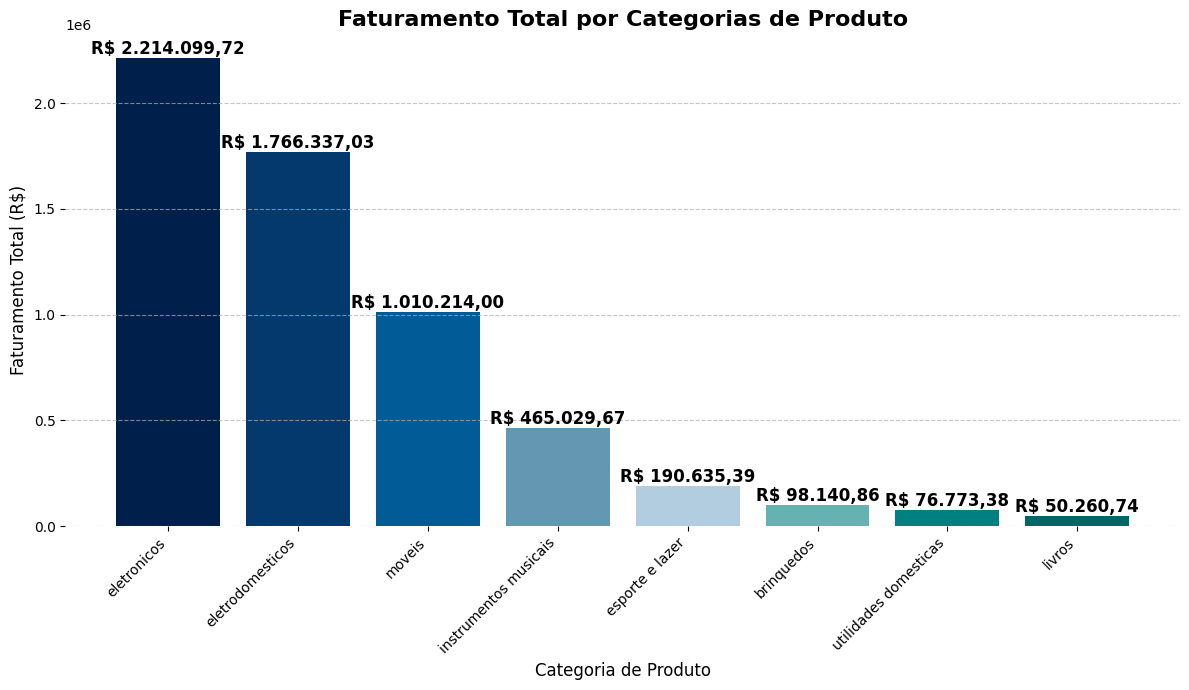

In [5]:
import locale
import csv
import requests
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    # f-string com :.2f para 2 casas decimais, depois substitui separadores
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------


# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# Variáveis para coleta de dados das categorias (total geral) | plotando o gráfico
vendas_por_categoria = {}
cores_barras = ['#011f4b', '#03396c', '#005b96', '#6497b1', '#b3cde0', '#66b2b2', '#008080', '#006666']

print("Calculando faturamento para visualização...")

# Processar todas as lojas para preencher vendas_por_categorias
for i, url in enumerate(urls):
    print(f"Processando Loja {i + 1} (URL: {url})...")
    dados_loja = ler_csv(url)

    if not dados_loja:
        print(f"Nenhum dado encontrado para a loja {i + 1}. Pulando esta loja.")
        print("---")
        continue

    # Loop para processar cada venda na loja atual
    for venda in dados_loja:
        try:
            # Garantir que as chaves existem e os valores podem ser convertidos
            categoria = venda['Categoria do Produto']
            preco = float(venda['Preço'])
            valor_venda = preco

            # Adicionar ao dicionário da loja atual
            if categoria in categorias_loja:
                categorias_loja[categoria] += valor_venda
            else:
                categorias_loja[categoria] = valor_venda

            # Adicionar ao dicionário geral (total de todas as lojas)
            if categoria in vendas_por_categoria:
                vendas_por_categoria[categoria] += valor_venda
            else:
                vendas_por_categoria[categoria] = valor_venda
        except KeyError as e:
            # Captura erros se uma chave como 'Preço' ou 'Categoria do Produto' não for encontrada
            print(f"AVISO (Loja {i+1}): Coluna não encontrada ({e}). Venda: {venda}. Ignorando esta venda.")
        except ValueError as e:
            # Captura erros se a conversão para float ou int falhar
            print(f"AVISO (Loja {i+1}): Erro de valor ({e}). Venda: {venda}. Ignorando esta venda.")


    print("---")

categorias_para_grafico = list(vendas_por_categoria.keys())
valores_categorias_para_grafico = list(vendas_por_categoria.values())

print("\nDados para o gráfico de categorias coletados.")

# ORDENAÇÃO DOS DADOS --------

# Lista de tuplas (categoria, valor)
dados_ordenaveis = sorted(vendas_por_categoria.items(), key=lambda item: item[1], reverse=True)

# Desempacotando a lista ordenada de volta para categorias e valores
categorias_para_grafico = [item[0] for item in dados_ordenaveis]
valores_categorias_para_grafico = [item[1] for item in dados_ordenaveis]


# Criando as barras do gráfico
plt.figure(figsize=(12, 7))
plt.bar(categorias_para_grafico, valores_categorias_para_grafico, color=cores_barras)

# Removendo a borda do gráfico
ax = plt.gca() # Obtém o eixo atual (área de plotagem)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Adicionando títulos e categorias
plt.title('Faturamento Total por Categorias de Produto', fontsize=16, fontweight='bold')
plt.xlabel('Categoria de Produto', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)

# Adicionando os valores às categorias no topo da barra
for categoria_nome, valor_categoria in zip(categorias_para_grafico, valores_categorias_para_grafico):
    plt.text(categoria_nome, valor_categoria, formatar_moeda_br(valor_categoria), ha='center', va='bottom', fontsize=12, rotation=0, color='black', fontweight='bold')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Salvando o gráfico
plt.savefig('faturamento_por_categorias_grafico.png')
print("\nGráfico 'faturamento_por_categorias_grafico.png' gerado com sucesso.")

# Mostrando o gráfico
plt.show()


##1.4. Faturamento por Produtos: **Identificação dos produtos mais vendidos e seus respectivos valores gerados.**

Iniciando o cálculo do faturamento e frequência de vendas por produto...
Processando Loja 1 para faturamento e quantidade por produto (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...
---
Processando Loja 2 para faturamento e quantidade por produto (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...
---
Processando Loja 3 para faturamento e quantidade por produto (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)...
---
Processando Loja 4 para faturamento e quantidade por produto (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)...
---

Cálculo de faturamento e frequência de vendas por produto concluído.

--- Resumo de Faturamento por Produto ---
Produt

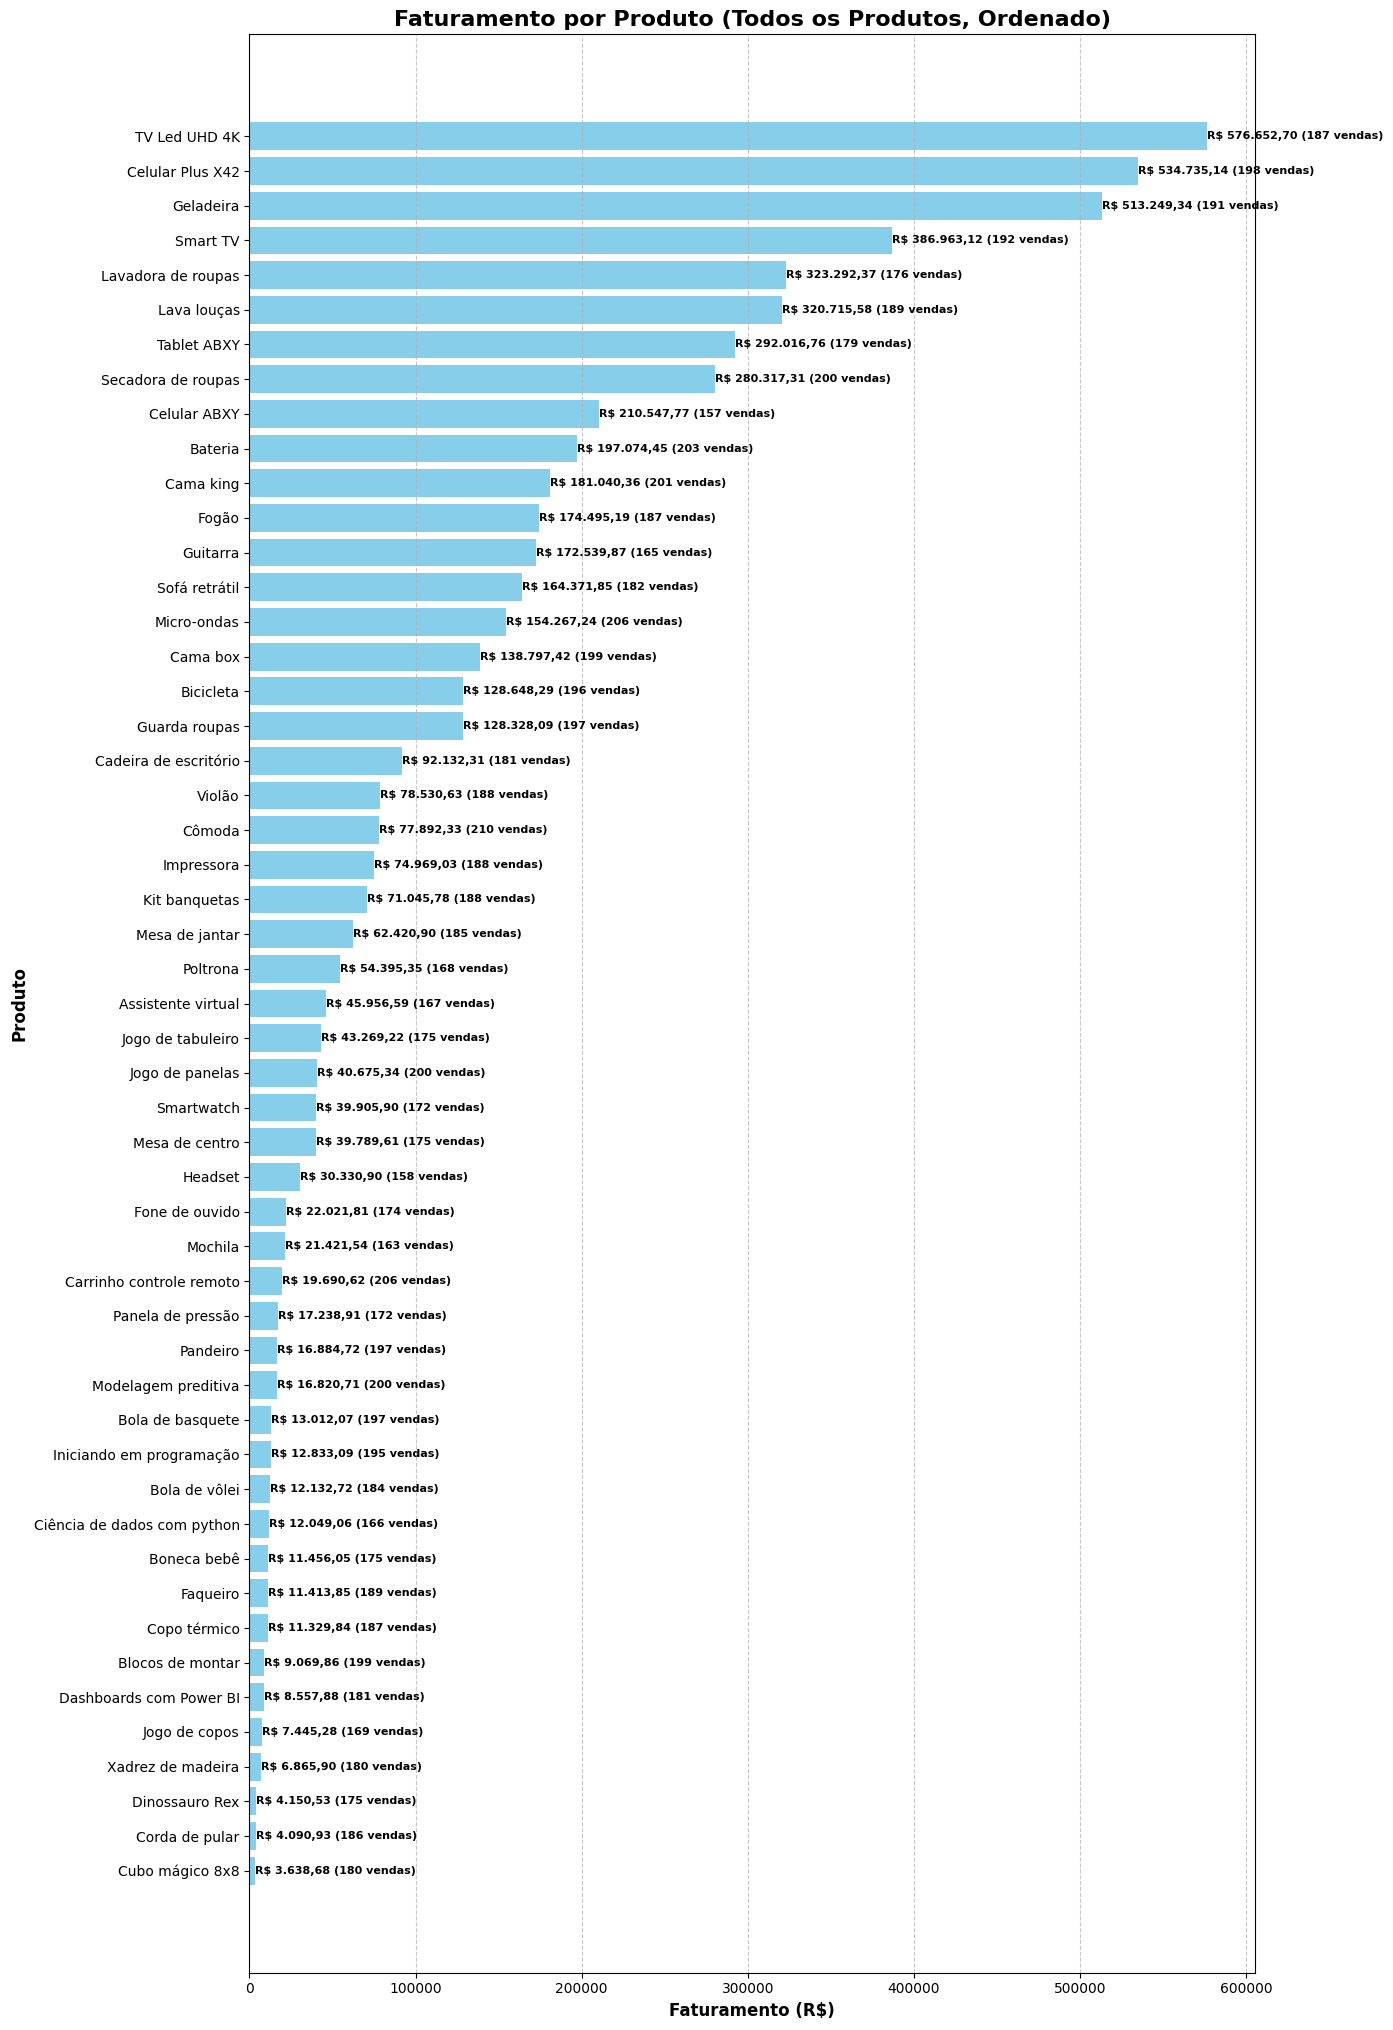

In [6]:
import locale
import csv
import requests
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    # f-string com :.2f para 2 casas decimais, depois substitui separadores
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------


# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# --- Análise de Faturamento e Frequência de Vendas por Produto ---
# Dicionário para armazenar o faturamento total por produto
faturamento_por_produto = {}
frequencia_vendas_por_produtos = {}
total_geral_vendas_registradas = 0

print("Iniciando o cálculo do faturamento e frequência de vendas por produto...")

for i, url in enumerate(urls):
    print(f"Processando Loja {i + 1} para faturamento e quantidade por produto (URL: {url})...")
    dados_loja = ler_csv(url)

    if not dados_loja:
        print(f"Nenhum dado encontrado para a loja {i + 1}. Pulando esta loja.")
        print("---")
        continue

    for venda in dados_loja:
        try:
            produto = venda['Produto'] # Coluna do nome do produto
            preco = float(venda['Preço'])

            # Acumular faturamento por produto
            if produto in faturamento_por_produto:
                faturamento_por_produto[produto] += preco
            else:
                faturamento_por_produto[produto] = preco

            # Acumular frequência de vendas por produto
            if produto in frequencia_vendas_por_produtos:
                frequencia_vendas_por_produtos[produto] += 1
            else:
                frequencia_vendas_por_produtos[produto] = 1

            total_geral_vendas_registradas += 1


        except KeyError as e:
            print(f"AVISO (Loja {i+1}): Coluna 'Produto', 'Preço' ou 'Quantidade' não encontrada ({e}). Venda: {venda}. Ignorando esta venda.")
        except ValueError as e:
            print(f"AVISO (Loja {i+1}): Erro de valor em 'Preço' ou 'Quantidade' ({e}). Venda: {venda}. Ignorando esta venda.")
    print("---")

print("\nCálculo de faturamento e frequência de vendas por produto concluído.")

# --- Identificando o Produto Mais e Menos Vendido (por Faturamento) ---
if faturamento_por_produto:
    # Ordena os produtos por faturamento (do maior para o menor)
    produtos_ordenados_por_faturamento = sorted(faturamento_por_produto.items(), key=lambda item: item[1], reverse=True)

    produto_mais_vendido_faturamento = produtos_ordenados_por_faturamento[0]
    produto_menos_vendido_faturamento = produtos_ordenados_por_faturamento[-1]

    print("\n--- Resumo de Faturamento por Produto ---")
    print(f"Produto Mais Vendido (Faturamento): '{produto_mais_vendido_faturamento[0]}' com faturamento de {formatar_moeda_br(produto_mais_vendido_faturamento[1])}")
    print(f"Produto Menos Vendido (Faturamento): '{produto_menos_vendido_faturamento[0]}' com faturamento de {formatar_moeda_br(produto_menos_vendido_faturamento[1])}")


    print(f"\nTotal Geral de Vendas Registradas:{total_geral_vendas_registradas} ocorrências.")

    # --- Preparar dados para o gráfico de TODOS os Produtos (ordenados por Faturamento) ---
    nomes_todos_produtos = [item[0] for item in produtos_ordenados_por_faturamento]
    faturamentos_todos_produtos = [item[1] for item in produtos_ordenados_por_faturamento]

    # --- Visualização em Gráfico de Barras (TODOS os Produtos por Faturamento) ---
    plt.figure(figsize=(14, max(8, len(nomes_todos_produtos) * 0.4))) # Ajusta o tamanho da figura dinamicamente
    plt.barh(nomes_todos_produtos, faturamentos_todos_produtos, color='skyblue')

    # Personalização do gráfico
    plt.title('Faturamento por Produto (Todos os Produtos, Ordenado)', fontsize=16, fontweight='bold')
    plt.xlabel('Faturamento (R$)', fontsize=12, fontweight='bold')
    plt.ylabel('Produto', fontsize=12, fontweight='bold')

    # Adicionar valores sobre as barras (Faturamento e Quantidade)
    for i, (valor_faturamento, nome_produto) in enumerate(zip(faturamentos_todos_produtos, nomes_todos_produtos)):
        # Busca a frequência vendida para o produto atual
        freq_vendida = frequencia_vendas_por_produtos.get(nome_produto, 0)
        label_texto = f"{formatar_moeda_br(valor_faturamento)} ({freq_vendida} vendas)"
        plt.text(valor_faturamento, i, label_texto, ha='left', va='center', fontsize=8, rotation=0, color='black', fontweight='bold')

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.gca().invert_yaxis() # Inverte o eixo Y para que o maior valor fique no topo
    plt.savefig('faturamento_todos_produtos_grafico.png')
    print(f"\nGráfico 'faturamento_todos_produtos_grafico.png' gerado com sucesso.")
    plt.show()

else:
    print("Não foi possível calcular o faturamento e frequência de vendas por produto (dados não carregados ou ausentes).")

Iniciando o cálculo de faturamento por produto, por loja...

Processando Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...
Faturamento Total da Loja 1: R$ 1.534.509,12
Gráfico 'faturamento_top_5_produtos_Loja_1_grafico.png' gerado com sucesso.


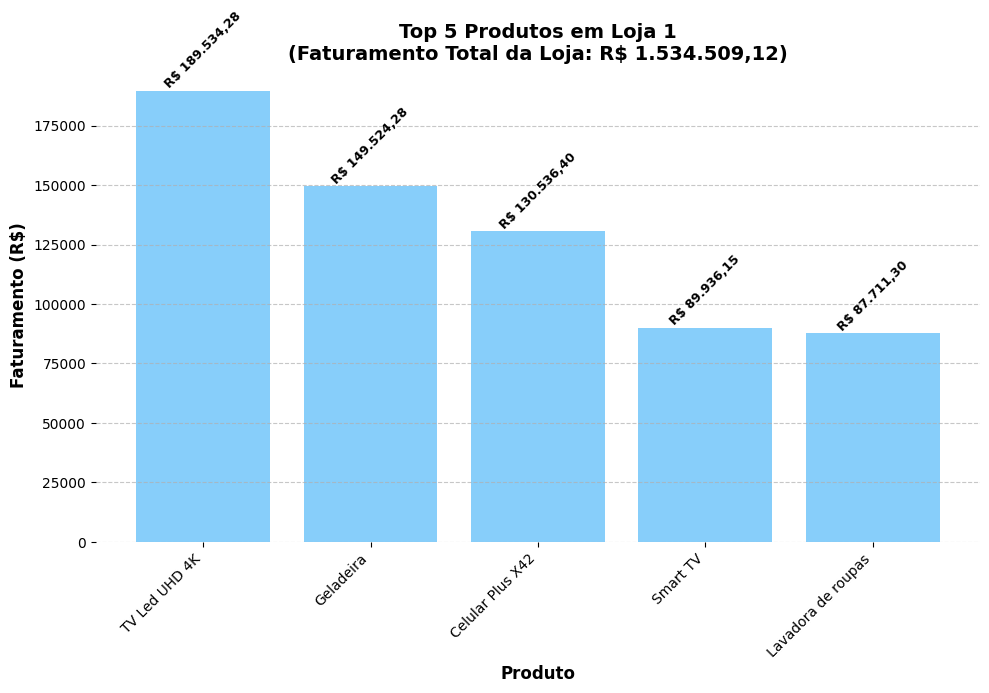


Processando Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...
Faturamento Total da Loja 2: R$ 1.488.459,06
Gráfico 'faturamento_top_5_produtos_Loja_2_grafico.png' gerado com sucesso.


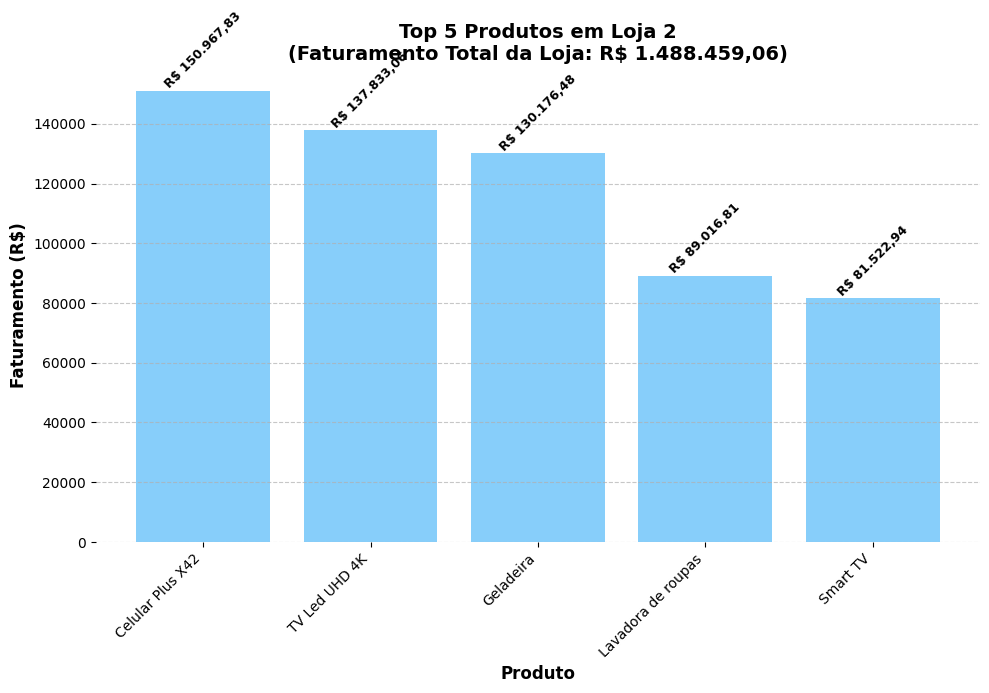


Processando Loja 3 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)...
Faturamento Total da Loja 3: R$ 1.464.025,03
Gráfico 'faturamento_top_5_produtos_Loja_3_grafico.png' gerado com sucesso.


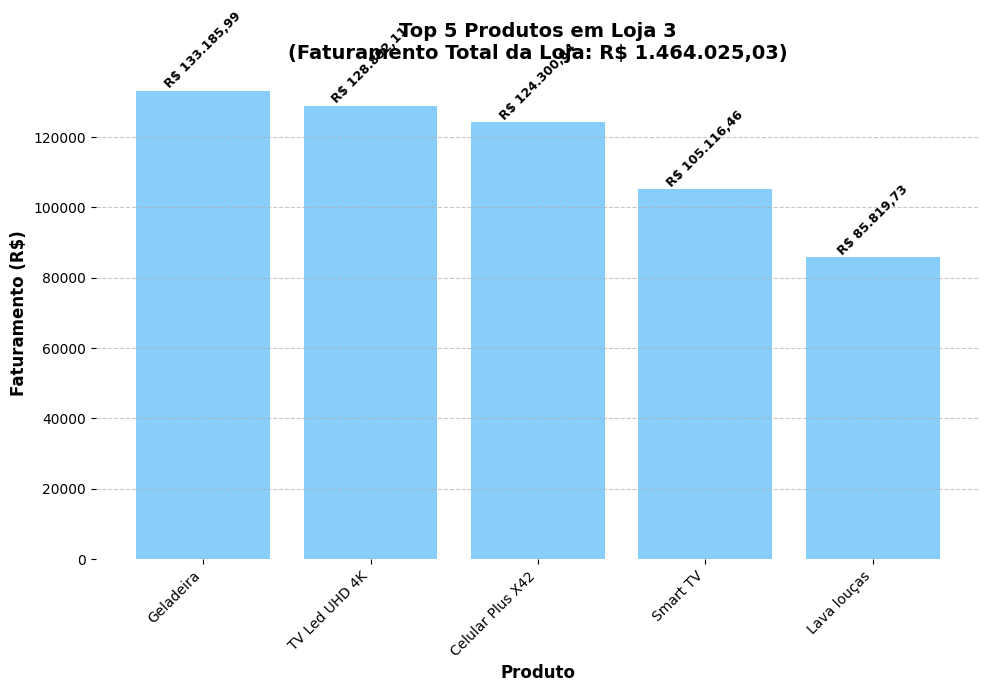


Processando Loja 4 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)...
Faturamento Total da Loja 4: R$ 1.384.497,58
Gráfico 'faturamento_top_5_produtos_Loja_4_grafico.png' gerado com sucesso.


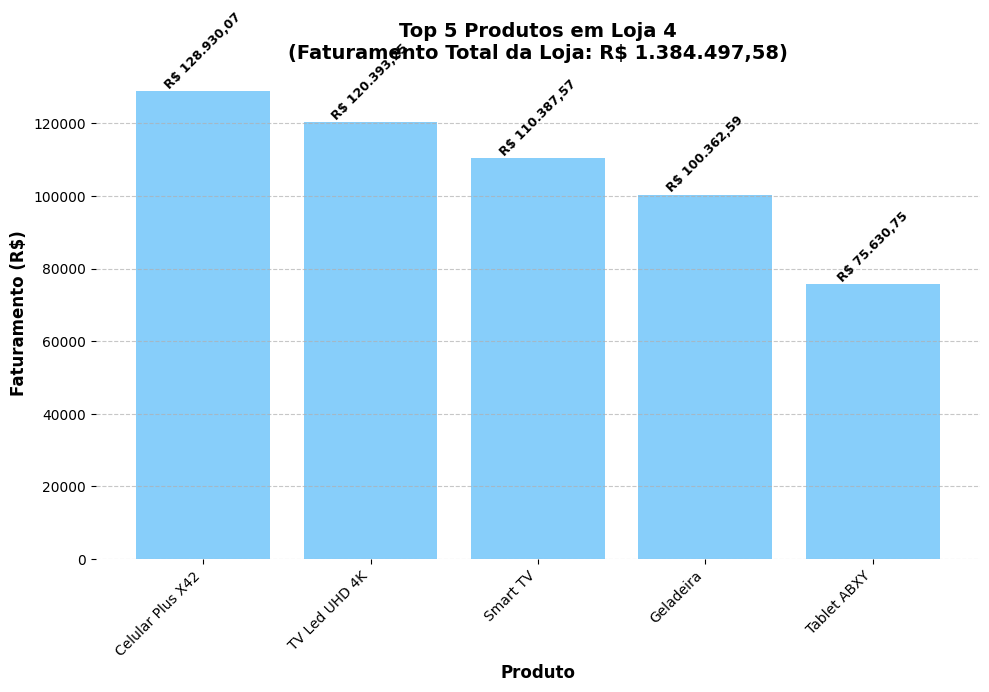


Análise de faturamento por produto, por loja, concluída.


In [7]:
# Análise de Faturamento por Produto, por Loja (e seus gráficos)
''' Para cada loja, vamos:
    1. calcular o faturamento total da loja.
    2. calcular o faturamento de cada produto dentro daquela loja.
    3. identificar os produtos mais vendidos dessa loja(os Top N).
    4. criar um gráfico de barras que mostra esses Top N produtos, e que
    de alguma forma contextualize o faturamento total da loja.
'''

import locale
import csv
import requests
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------

# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# --- Análise de Faturamento por Produto, por Loja ---
print("Iniciando o cálculo de faturamento por produto, por loja...")

# Iterar sobre cada loja para gerar um gráfico individual
for i, url in enumerate(urls):
    nome_loja_completo = f"Loja {i + 1}"
    print(f"\nProcessando {nome_loja_completo} (URL: {url})...")
    dados_loja = ler_csv(url)

    faturamento_total_loja = 0
    faturamento_produtos_na_loja = {} # Dicionário para produtos desta loja

    if not dados_loja:
        print(f"Nenhum dado encontrado para a {nome_loja_completo}. Pulando esta loja.")
        # Se não há dados, o gráfico será vazio ou não será gerado
        continue

    for venda in dados_loja:
        try:
            produto = venda['Produto']
            preco = float(venda['Preço'])

            faturamento_total_loja += preco # Acumula o faturamento total da loja

            if produto in faturamento_produtos_na_loja:
                faturamento_produtos_na_loja[produto] += preco
            else:
                faturamento_produtos_na_loja[produto] = preco
        except KeyError as e:
            print(f"AVISO ({nome_loja_completo}): Coluna 'Produto' ou 'Preço' não encontrada ({e}). Venda: {venda}. Ignorando esta venda.")
        except ValueError as e:
            print(f"AVISO ({nome_loja_completo}): Erro de valor em 'Preço' ({e}). Venda: {venda}. Ignorando esta venda.")

    print(f"Faturamento Total da {nome_loja_completo}: {formatar_moeda_br(faturamento_total_loja)}")

# --- Preparar dados para o gráfico dos Top N Produtos da LOJA ATUAL ---
    if faturamento_produtos_na_loja:
        # Ordenar os produtos desta loja por faturamento
        produtos_ordenados_loja = sorted(faturamento_produtos_na_loja.items(), key=lambda item: item[1], reverse=True)

        N_top_produtos_loja = 5 # Top 5 produtos por loja (você pode ajustar este N)
        top_n_produtos_loja = produtos_ordenados_loja[:N_top_produtos_loja]

        nomes_produtos_grafico = [item[0] for item in top_n_produtos_loja]
        faturamentos_produtos_grafico = [item[1] for item in top_n_produtos_loja]

        # --- Criação do Gráfico de Barras para a Loja Atual ---
        plt.figure(figsize=(10, 7)) # Tamanho da figura
        # Gráfico de colunas (bar) para produtos (categorias no X, faturamento no Y)
        plt.bar(nomes_produtos_grafico, faturamentos_produtos_grafico, color='lightskyblue')

        # Remover bordas
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        # Títulos e rótulos
        plt.title(f'Top {N_top_produtos_loja} Produtos em {nome_loja_completo}\n'
                  f'(Faturamento Total da Loja: {formatar_moeda_br(faturamento_total_loja)})',
                  fontsize=14, fontweight='bold', ha='center') # Título em duas linhas, centralizado
        plt.xlabel('Produto', fontsize=12, fontweight='bold')
        plt.ylabel('Faturamento (R$)', fontsize=12, fontweight='bold')

        # Rótulos de valor nas barras
        for j, (produto_nome, faturamento_valor) in enumerate(zip(nomes_produtos_grafico, faturamentos_produtos_grafico)):
            plt.text(j, faturamento_valor, formatar_moeda_br(faturamento_valor),
                     ha='center', va='bottom', fontsize=9, rotation=45, color='black', fontweight='bold')

        plt.grid(axis='y', linestyle='--', alpha=0.7) # Grade no eixo Y (faturamento)
        plt.xticks(rotation=45, ha='right') # Rotação dos nomes dos produtos no eixo X
        plt.tight_layout() # Ajusta o layout para evitar sobreposição de rótulos

        # Salvar o gráfico
        plt.savefig(f'faturamento_top_{N_top_produtos_loja}_produtos_{nome_loja_completo.replace(" ", "_")}_grafico.png')
        print(f"Gráfico 'faturamento_top_{N_top_produtos_loja}_produtos_{nome_loja_completo.replace(' ', '_')}_grafico.png' gerado com sucesso.")
        plt.show()

    else:
        print(f"Não há dados de produtos para {nome_loja_completo} para gerar o gráfico.")
    print("="*50) # Separador visual entre as lojas

print("\nAnálise de faturamento por produto, por loja, concluída.")



# 2. Desempenho de vendas

##2.1. Média de Avaliação das Lojas


--- Análise de Média de Avaliação por Loja e por Produto (usando Pandas) ---
Carregando dados da Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...
Carregando dados da Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...
Carregando dados da Loja 3 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)...
Carregando dados da Loja 4 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)...
---

--- Colunas do DataFrame de Vendas ---
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      

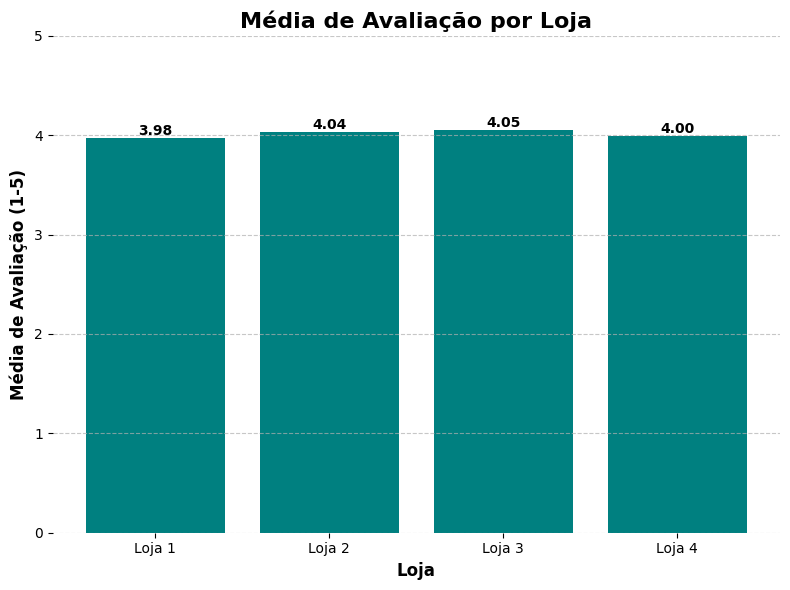


--- Faturamento e Média de Avaliação por Produto (Pandas) ---
Produto: 'TV Led UHD 4K' - Faturamento: R$ 576.652,70 - Média Avaliação: 3.99 (187 avaliações)
Produto: 'Celular Plus X42' - Faturamento: R$ 534.735,14 - Média Avaliação: 3.96 (198 avaliações)
Produto: 'Geladeira' - Faturamento: R$ 513.249,34 - Média Avaliação: 4.16 (191 avaliações)
Produto: 'Smart TV' - Faturamento: R$ 386.963,12 - Média Avaliação: 3.96 (192 avaliações)
Produto: 'Lavadora de roupas' - Faturamento: R$ 323.292,37 - Média Avaliação: 3.94 (176 avaliações)
Produto: 'Lava louças' - Faturamento: R$ 320.715,58 - Média Avaliação: 3.96 (189 avaliações)
Produto: 'Tablet ABXY' - Faturamento: R$ 292.016,76 - Média Avaliação: 3.96 (179 avaliações)
Produto: 'Secadora de roupas' - Faturamento: R$ 280.317,31 - Média Avaliação: 4.01 (200 avaliações)
Produto: 'Celular ABXY' - Faturamento: R$ 210.547,77 - Média Avaliação: 4.05 (157 avaliações)
Produto: 'Bateria' - Faturamento: R$ 197.074,45 - Média Avaliação: 4.13 (203 avalia

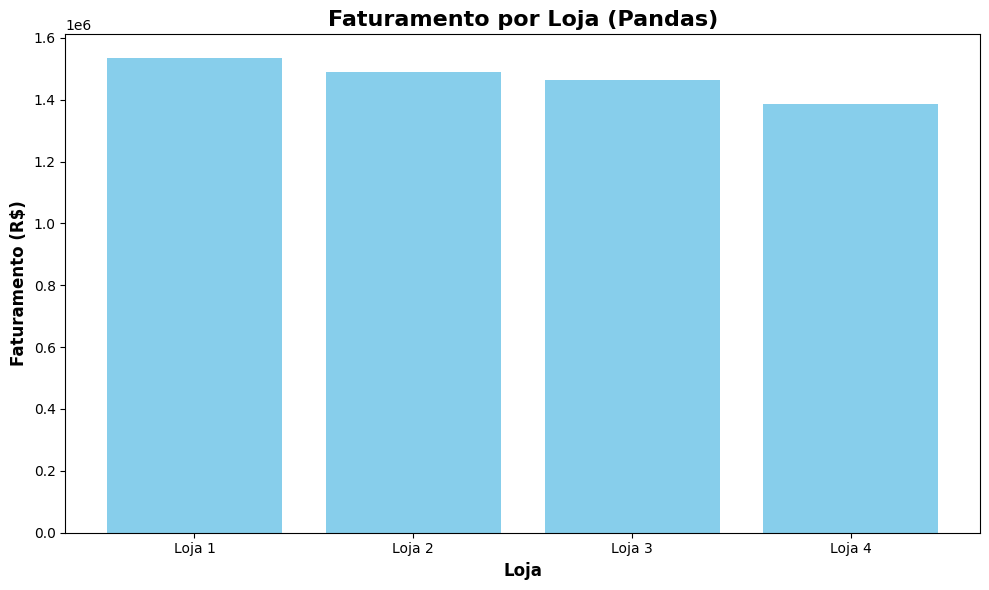

In [18]:
import locale
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------

# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados


# --- Análise de Média de Avaliação das Lojas e Produtos (com PANDAS) ---
print("\n--- Análise de Média de Avaliação por Loja e por Produto (usando Pandas) ---")

todos_dados_vendas = []
# Primeiro, consolide todos os dados de vendas em uma única lista de dicionários
for i, url in enumerate(urls):
    nome_loja = f"Loja {i + 1}"
    print(f"Carregando dados da {nome_loja} (URL: {url})...")
    dados_loja = ler_csv(url)
    if dados_loja:
        # Adiciona uma coluna 'Loja' a cada registro ANTES de consolidar
        for venda in dados_loja:
            venda['Loja'] = nome_loja
        todos_dados_vendas.extend(dados_loja)
    else:
        print(f"Nenhum dado carregado para a {nome_loja}.")
print("---")

if todos_dados_vendas:
    df_vendas = pd.DataFrame(todos_dados_vendas)

      # --- ADIÇÃO CRÍTICA PARA DEPURAR ---
    print("\n--- Colunas do DataFrame de Vendas ---")
    print(df_vendas.columns)
    print("\n--- Primeiras linhas do DataFrame de Vendas ---")
    print(df_vendas.head())
    # ------------------------------------

    # Converte 'Preço' e 'Avaliação da compra' para numérico, tratando erros
    df_vendas['Preço'] = pd.to_numeric(df_vendas['Preço'], errors='coerce')
    df_vendas['Avaliação da compra'] = pd.to_numeric(df_vendas['Avaliação da compra'], errors='coerce')

    # Remove linhas onde 'Preço' ou 'Avaliação da compra' não são números válidos para evitar problemas nos cálculos
    df_vendas.dropna(subset=['Preço', 'Avaliação da compra'], inplace=True)

    if not df_vendas.empty:
        # Faturamento por Loja
        faturamento_por_loja_df = df_vendas.groupby('Loja')['Preço'].sum().reset_index()
        print("\n--- Faturamento por Loja (Pandas) ---")
        for index, row in faturamento_por_loja_df.iterrows():
            print(f"{row['Loja']}: {formatar_moeda_br(row['Preço'])}")

        # Média de Avaliação por Loja
        media_avaliacao_por_loja_df = df_vendas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
        print("\n--- Média de Avaliação por Loja (Pandas) ---")
        for index, row in media_avaliacao_por_loja_df.iterrows():
            print(f"{row['Loja']}: {row['Avaliação da compra']:.2f}")

        # Criação do gráfico de barras de Avaliações por loja (com Pandas)
        if not media_avaliacao_por_loja_df.empty:
            plt.figure(figsize=(8, 6))
            plt.bar(media_avaliacao_por_loja_df['Loja'], media_avaliacao_por_loja_df['Avaliação da compra'], color='teal')

            # Removendo bordas
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)

            # Títulos e rótulos
            plt.title('Média de Avaliação por Loja', fontsize=16, fontweight='bold')
            plt.xlabel('Loja', fontsize=12, fontweight='bold')
            plt.ylabel('Média de Avaliação (1-5)', fontsize=12, fontweight='bold')
            plt.ylim(0, 5) # Avaliações geralmente de 1 a 5

            # Rótulos de valor nas barras
            for x_pos, y_val in enumerate(media_avaliacao_por_loja_df['Avaliação da compra']):
                plt.text(x_pos, y_val, f'{y_val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=0)
            plt.tight_layout()

            plt.savefig('media_avaliacao_por_loja_grafico_pandas.png')
            print(f"\nGráfico 'media_avaliacao_por_loja_grafico_pandas.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de média de avaliação por loja (DataFrame de médias vazio).")

        # Faturamento e Média de Avaliação por Produto
        faturamento_e_avaliacao_por_produto_df = df_vendas.groupby('Produto').agg(
            Faturamento=('Preço', 'sum'),
            Media_Avaliacao=('Avaliação da compra', 'mean'),
            Contagem_Avaliacoes=('Avaliação da compra', 'count') # Para saber quantas avaliações cada produto teve
        ).reset_index()

        # Ordena por faturamento
        faturamento_e_avaliacao_por_produto_df.sort_values(by='Faturamento', ascending=False, inplace=True)

        print("\n--- Faturamento e Média de Avaliação por Produto (Pandas) ---")
        # Exibe os top 10 produtos por faturamento e suas médias de avaliação
        for index, row in faturamento_e_avaliacao_por_produto_df.head(10).iterrows():
            print(f"Produto: '{row['Produto']}' - Faturamento: {formatar_moeda_br(row['Faturamento'])} - Média Avaliação: {row['Media_Avaliacao']:.2f} ({row['Contagem_Avaliacoes']} avaliações)")

        # Geração de Gráficos com Pandas (exemplo para Faturamento por Loja)
        # Você pode adaptar para outros gráficos usando os DataFrames criados
        nomes_lojas_grafico = faturamento_por_loja_df['Loja'].tolist()
        faturamentos_lojas_grafico = faturamento_por_loja_df['Preço'].tolist()

        plt.figure(figsize=(10, 6))
        plt.bar(nomes_lojas_grafico, faturamentos_lojas_grafico, color='skyblue')
        plt.title('Faturamento por Loja (Pandas)', fontsize=16, fontweight='bold')
        plt.xlabel('Loja', fontsize=12, fontweight='bold')
        plt.ylabel('Faturamento (R$)', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.savefig('faturamento_por_loja_pandas_grafico.png')
        plt.show()

    else:
        print("DataFrame de vendas vazio após o pré-processamento. Verifique os dados.")
else:
    print("Nenhum dado de venda carregado para análise. Verifique as URLs ou a conexão.")

##2.2. Volume de vendas por loja: **quantidade de itens vendidos por cada unidade**


--- Análise de Volume de Vendas por Loja ---
Carregando dados da Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...
Carregando dados da Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...
Carregando dados da Loja 3 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)...
Carregando dados da Loja 4 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)...
---

--- Volume de Vendas por Loja (Contagem de Ocorrências) ---
Loja 1: 2359 vendas
Loja 2: 2359 vendas
Loja 3: 2359 vendas
Loja 4: 2358 vendas

Gráfico 'volume_vendas_por_loja_grafico.png' gerado com sucesso.


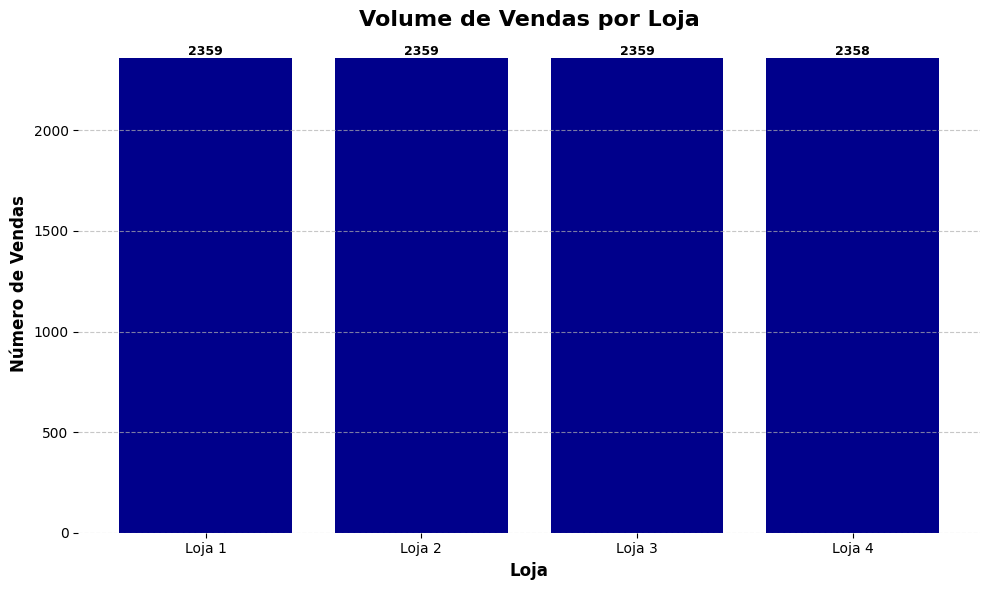

In [20]:
import pandas as pd
import csv
import requests
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------

# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# --- Análise de Volume de Vendas por Loja (Quantidade de Itens Vendidos) ---
print("\n--- Análise de Volume de Vendas por Loja ---")

todos_dados_vendas = []
# Primeiro, consolide todos os dados de vendas em uma única lista de dicionários
for i, url in enumerate(urls):
    nome_loja = f"Loja {i + 1}"
    print(f"Carregando dados da {nome_loja} (URL: {url})...")
    dados_loja = ler_csv(url)
    if dados_loja:
        # Adiciona uma coluna 'Loja' a cada registro ANTES de consolidar
        for venda in dados_loja:
            venda['Loja'] = nome_loja
        todos_dados_vendas.extend(dados_loja)
    else:
        print(f"Nenhum dado carregado para a {nome_loja}.")
print("---")

if todos_dados_vendas:
    df_vendas = pd.DataFrame(todos_dados_vendas)

    # Convertendo 'Preço' e 'Avaliação da compra' para numérico, tratando erros
    # --- MODIFICAÇÃO SOLICITADA AQUI ---
    df_vendas['Preço'] = pd.to_numeric(df_vendas['Preço'], errors='coerce')
    df_vendas['Avaliação da compra'] = pd.to_numeric(df_vendas['Avaliação da compra'], errors='coerce')
    # --- FIM DA MODIFICAÇÃO ---

    # Removendo linhas com valores inválidos que impediriam cálculos
    # --- MODIFICAÇÃO SOLICITADA AQUI ---
    df_vendas.dropna(subset=['Preço', 'Avaliação da compra'], inplace=True)
    # --- FIM DA MODIFICAÇÃO ---

    if not df_vendas.empty:
        # --- Cálculo do Volume de Vendas por Loja (Contagem de Vendas/Linhas) ---
        # Assumindo que cada linha na base de dados é um item/venda
        volume_vendas_por_loja_df = df_vendas.groupby('Loja').size().reset_index(name='Volume de Vendas')

        # Ordenar para o gráfico (opcional, mas bom para visualização)
        volume_vendas_por_loja_df.sort_values(by='Volume de Vendas', ascending=False, inplace=True)

        print("\n--- Volume de Vendas por Loja (Contagem de Ocorrências) ---")
        for index, row in volume_vendas_por_loja_df.iterrows():
            print(f"{row['Loja']}: {row['Volume de Vendas']} vendas")

        # --- Geração do Gráfico de Colunas: Volume de Vendas por Loja ---
        plt.figure(figsize=(10, 6))
        plt.bar(volume_vendas_por_loja_df['Loja'], volume_vendas_por_loja_df['Volume de Vendas'], color='darkblue')

        # Remover bordas
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        # Títulos e rótulos
        plt.title('Volume de Vendas por Loja', fontsize=16, fontweight='bold')
        plt.xlabel('Loja', fontsize=12, fontweight='bold')
        plt.ylabel('Número de Vendas', fontsize=12, fontweight='bold')

        # Adicionar valores sobre as barras
        for x_pos, y_val in enumerate(volume_vendas_por_loja_df['Volume de Vendas']):
            plt.text(x_pos, y_val, f'{y_val}', ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=0)
        plt.tight_layout()

        plt.savefig('volume_vendas_por_loja_grafico.png')
        print(f"\nGráfico 'volume_vendas_por_loja_grafico.png' gerado com sucesso.")
        plt.show()

    else:
        print("DataFrame de vendas vazio após o pré-processamento. Verifique os dados.")
else:
    print("Nenhum dado de venda carregado para análise. Verifique as URLs ou a conexão.")

##2.3. Volume de vendas por categorias: **Quantidade de itens vendidos por cada tipo de produto**


--- Carregando e Consolidando Dados de Vendas ---
Carregando dados da Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...
Carregando dados da Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...
Carregando dados da Loja 3 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)...
Carregando dados da Loja 4 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)...
---

--- Faturamento por Loja ---
Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58

--- Média de Avaliação por Loja ---
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00

Gráfico 'media_avaliacao_por_loja_grafico_pandas.png' gerado com sucesso.

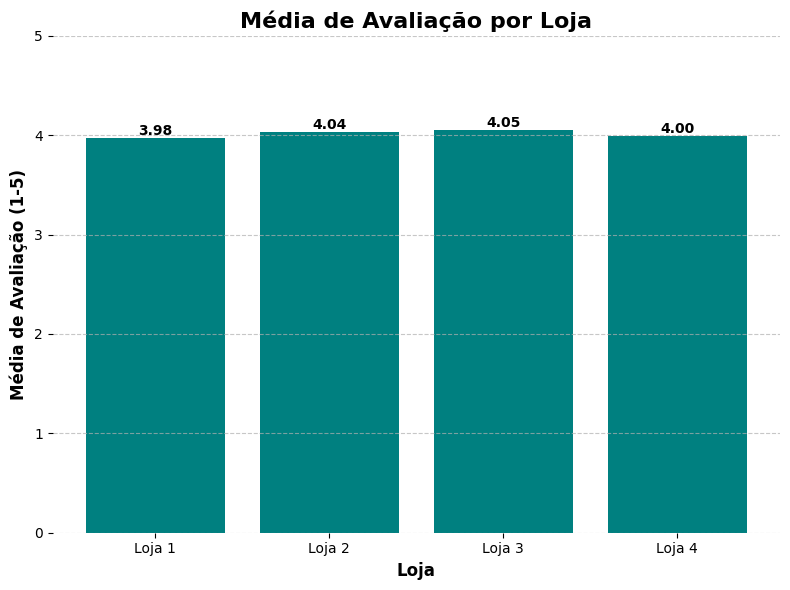


--- Volume de Vendas por Loja (Contagem de Ocorrências) ---
Loja 1: 2359 vendas
Loja 2: 2359 vendas
Loja 3: 2359 vendas
Loja 4: 2358 vendas

Gráfico 'volume_vendas_por_loja_grafico.png' gerado com sucesso.


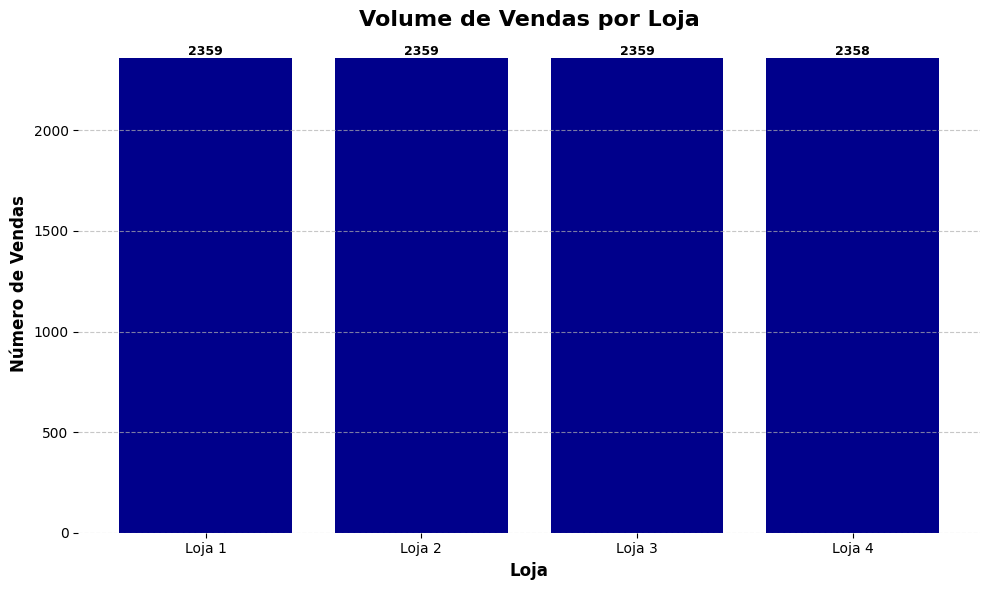


--- Volume de Vendas por Categoria (Produto) ---
Produto: 'Cômoda' - 210 vendas
Produto: 'Carrinho controle remoto' - 206 vendas
Produto: 'Micro-ondas' - 206 vendas
Produto: 'Bateria' - 203 vendas
Produto: 'Cama king' - 201 vendas
Produto: 'Jogo de panelas' - 200 vendas
Produto: 'Modelagem preditiva' - 200 vendas
Produto: 'Secadora de roupas' - 200 vendas
Produto: 'Blocos de montar' - 199 vendas
Produto: 'Cama box' - 199 vendas
Produto: 'Celular Plus X42' - 198 vendas
Produto: 'Bola de basquete' - 197 vendas
Produto: 'Pandeiro' - 197 vendas
Produto: 'Guarda roupas' - 197 vendas
Produto: 'Bicicleta' - 196 vendas
... e mais 36 outros produtos.

Gráfico 'top_15_produtos_volume_vendas_grafico.png' gerado com sucesso.


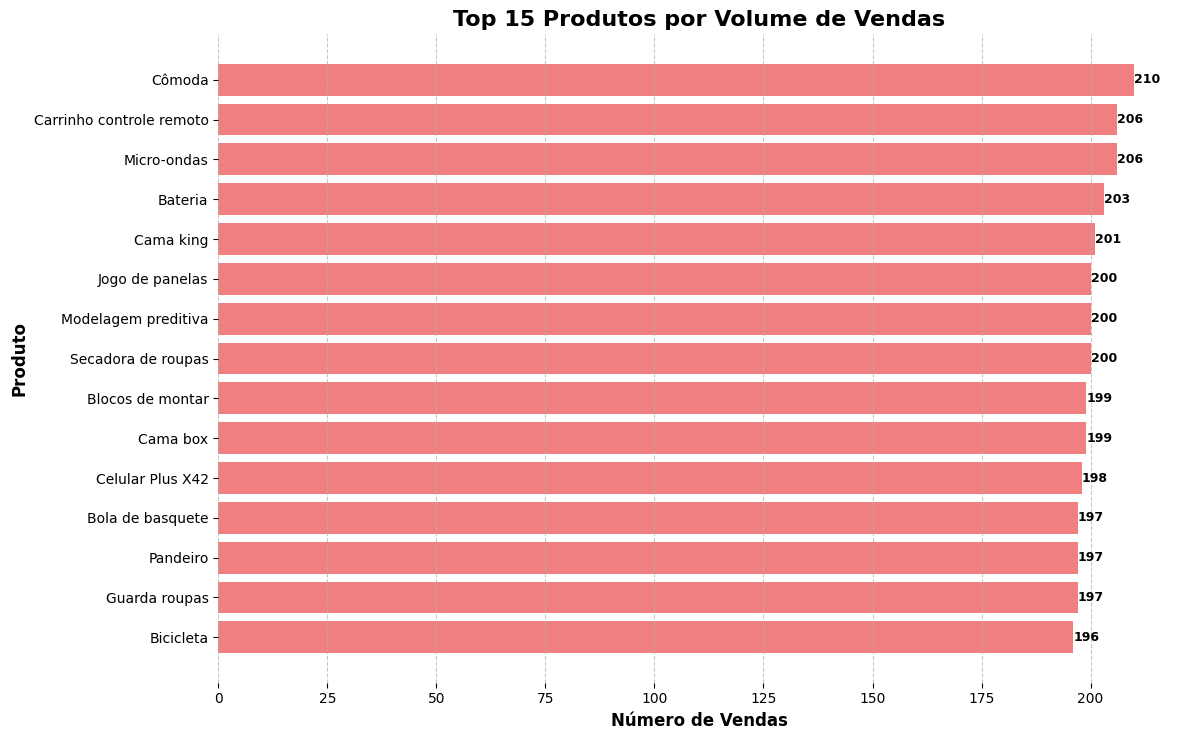

In [21]:
import pandas as pd
import csv
import requests
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------

# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# --- Análise de Dados Consolidados (com PANDAS) ---
print("\n--- Carregando e Consolidando Dados de Vendas ---")

todos_dados_vendas = []
# Primeiro, consolide todos os dados de vendas em uma única lista de dicionários
for i, url in enumerate(urls):
    nome_loja = f"Loja {i + 1}"
    print(f"Carregando dados da {nome_loja} (URL: {url})...")
    dados_loja = ler_csv(url)
    if dados_loja:
        # Adiciona uma coluna 'Loja' a cada registro ANTES de consolidar
        for venda in dados_loja:
            venda['Loja'] = nome_loja
        todos_dados_vendas.extend(dados_loja)
    else:
        print(f"Nenhum dado carregado para a {nome_loja}.")
print("---")

if todos_dados_vendas:
    df_vendas = pd.DataFrame(todos_dados_vendas)

    # Convertendo 'Preço' e 'Avaliação da compra' para numérico, tratando erros
    df_vendas['Preço'] = pd.to_numeric(df_vendas['Preço'], errors='coerce')
    df_vendas['Avaliação da compra'] = pd.to_numeric(df_vendas['Avaliação da compra'], errors='coerce')

    # Removendo linhas com valores inválidos que impediriam cálculos
    df_vendas.dropna(subset=['Preço', 'Avaliação da compra'], inplace=True)

    if not df_vendas.empty:
        # --- Análise de Faturamento por Loja ---
        faturamento_por_loja_df = df_vendas.groupby('Loja')['Preço'].sum().reset_index()
        print("\n--- Faturamento por Loja ---")
        for index, row in faturamento_por_loja_df.iterrows():
            print(f"{row['Loja']}: {formatar_moeda_br(row['Preço'])}")

        # --- Análise de Média de Avaliação por Loja ---
        media_avaliacao_por_loja_df = df_vendas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
        print("\n--- Média de Avaliação por Loja ---")
        for index, row in media_avaliacao_por_loja_df.iterrows():
            print(f"{row['Loja']}: {row['Avaliação da compra']:.2f}")

        # --- Geração do Gráfico de Barras de Avaliações por Loja ---
        if not media_avaliacao_por_loja_df.empty:
            plt.figure(figsize=(8, 6))
            plt.bar(media_avaliacao_por_loja_df['Loja'], media_avaliacao_por_loja_df['Avaliação da compra'], color='teal')
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.title('Média de Avaliação por Loja', fontsize=16, fontweight='bold')
            plt.xlabel('Loja', fontsize=12, fontweight='bold')
            plt.ylabel('Média de Avaliação (1-5)', fontsize=12, fontweight='bold')
            plt.ylim(0, 5)
            for x_pos, y_val in enumerate(media_avaliacao_por_loja_df['Avaliação da compra']):
                plt.text(x_pos, y_val, f'{y_val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.savefig('media_avaliacao_por_loja_grafico_pandas.png')
            print(f"\nGráfico 'media_avaliacao_por_loja_grafico_pandas.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de média de avaliação por loja (DataFrame de médias vazio).")

        # --- Análise de Volume de Vendas por Loja (Contagem de Ocorrências) ---
        volume_vendas_por_loja_df = df_vendas.groupby('Loja').size().reset_index(name='Volume de Vendas')
        volume_vendas_por_loja_df.sort_values(by='Volume de Vendas', ascending=False, inplace=True)
        print("\n--- Volume de Vendas por Loja (Contagem de Ocorrências) ---")
        for index, row in volume_vendas_por_loja_df.iterrows():
            print(f"{row['Loja']}: {row['Volume de Vendas']} vendas")

        # --- Geração do Gráfico de Colunas: Volume de Vendas por Loja ---
        if not volume_vendas_por_loja_df.empty:
            plt.figure(figsize=(10, 6))
            plt.bar(volume_vendas_por_loja_df['Loja'], volume_vendas_por_loja_df['Volume de Vendas'], color='darkblue')
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.title('Volume de Vendas por Loja', fontsize=16, fontweight='bold')
            plt.xlabel('Loja', fontsize=12, fontweight='bold')
            plt.ylabel('Número de Vendas', fontsize=12, fontweight='bold')
            for x_pos, y_val in enumerate(volume_vendas_por_loja_df['Volume de Vendas']):
                plt.text(x_pos, y_val, f'{y_val}', ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.savefig('volume_vendas_por_loja_grafico.png')
            print(f"\nGráfico 'volume_vendas_por_loja_grafico.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de volume de vendas por loja (DataFrame de volume vazio).")

        # --- NOVO: Análise de Volume de Vendas por Categoria (Produto) ---
        # Assumindo que cada linha é um item vendido
        volume_vendas_por_produto_df = df_vendas.groupby('Produto').size().reset_index(name='Volume de Vendas')

        # Ordenar os produtos pelo volume de vendas (do maior para o menor)
        volume_vendas_por_produto_df.sort_values(by='Volume de Vendas', ascending=False, inplace=True)

        print("\n--- Volume de Vendas por Categoria (Produto) ---")
        # Exibir os top 15 produtos por volume de vendas
        N_PRODUTOS_VOLUME = 15 # Define quantos produtos exibir na lista e no gráfico
        for index, row in volume_vendas_por_produto_df.head(N_PRODUTOS_VOLUME).iterrows():
            print(f"Produto: '{row['Produto']}' - {row['Volume de Vendas']} vendas")

        if len(volume_vendas_por_produto_df) > N_PRODUTOS_VOLUME:
            print(f"... e mais {len(volume_vendas_por_produto_df) - N_PRODUTOS_VOLUME} outros produtos.")


        # --- NOVO: Geração do Gráfico de Barras Horizontais: Volume de Vendas por Categoria (Top N) ---
        if not volume_vendas_por_produto_df.empty:
            # Pegar os N_PRODUTOS_VOLUME produtos com maior volume
            top_n_volume_produtos = volume_vendas_por_produto_df.head(N_PRODUTOS_VOLUME)

            plt.figure(figsize=(12, max(6, len(top_n_volume_produtos) * 0.5))) # Ajusta tamanho da figura dinamicamente
            plt.barh(top_n_volume_produtos['Produto'], top_n_volume_produtos['Volume de Vendas'], color='lightcoral')

            # Remover bordas
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)

            # Títulos e rótulos
            plt.title(f'Top {N_PRODUTOS_VOLUME} Produtos por Volume de Vendas', fontsize=16, fontweight='bold')
            plt.xlabel('Número de Vendas', fontsize=12, fontweight='bold')
            plt.ylabel('Produto', fontsize=12, fontweight='bold')

            # Adicionar valores sobre as barras
            for i, (volume_val, produto_nome) in enumerate(zip(top_n_volume_produtos['Volume de Vendas'], top_n_volume_produtos['Produto'])):
                plt.text(volume_val, i, f'{volume_val}', ha='left', va='center', fontsize=9, rotation=0, color='black', fontweight='bold')

            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.gca().invert_yaxis() # Inverte o eixo Y para que o maior valor fique no topo
            plt.savefig(f'top_{N_PRODUTOS_VOLUME}_produtos_volume_vendas_grafico.png')
            print(f"\nGráfico 'top_{N_PRODUTOS_VOLUME}_produtos_volume_vendas_grafico.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de volume de vendas por produto (DataFrame de volume vazio).")

    else:
        print("DataFrame de vendas vazio após o pré-processamento. Verifique os dados.")
else:
    print("Nenhum dado de venda carregado para análise. Verifique as URLs ou a conexão.")

##2.4. Ticket médio e produtos de alto e baixo desempenho: **Valor médio de cada transação ou compra e quais os produtos se destacam (positiva ou negativamente) em volume de faturamento e quantidade vendida**


--- Carregando e Consolidando Dados de Vendas ---
Carregando dados da Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...
Carregando dados da Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...
Carregando dados da Loja 3 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)...
Carregando dados da Loja 4 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)...
---

--- Faturamento por Loja ---
Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58

--- Média de Avaliação por Loja ---
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00

Gráfico 'media_avaliacao_por_loja_grafico_pandas.png' gerado com sucesso.

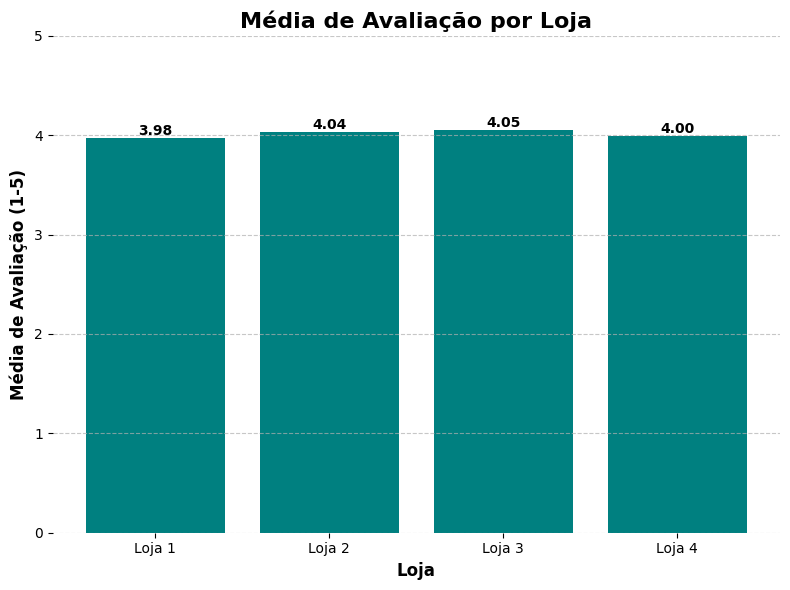


--- Volume de Vendas por Loja (Contagem de Ocorrências) ---
Loja 1: 2359 vendas
Loja 2: 2359 vendas
Loja 3: 2359 vendas
Loja 4: 2358 vendas

Gráfico 'volume_vendas_por_loja_grafico.png' gerado com sucesso.


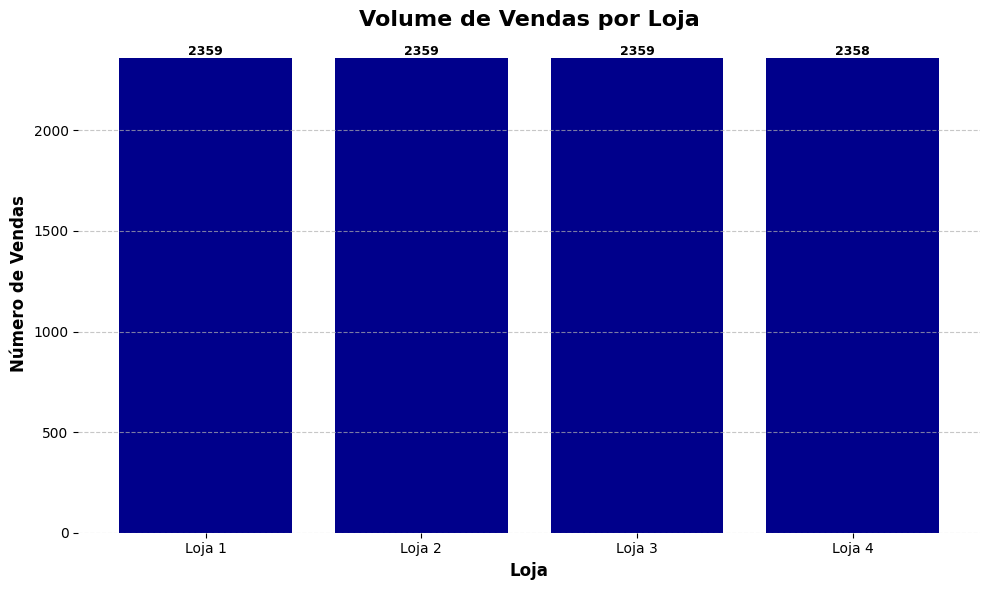


--- Volume de Vendas por Categoria (Produto) ---
Produto: 'Cômoda' - 210 vendas
Produto: 'Carrinho controle remoto' - 206 vendas
Produto: 'Micro-ondas' - 206 vendas
Produto: 'Bateria' - 203 vendas
Produto: 'Cama king' - 201 vendas
Produto: 'Jogo de panelas' - 200 vendas
Produto: 'Modelagem preditiva' - 200 vendas
Produto: 'Secadora de roupas' - 200 vendas
Produto: 'Blocos de montar' - 199 vendas
Produto: 'Cama box' - 199 vendas
Produto: 'Celular Plus X42' - 198 vendas
Produto: 'Bola de basquete' - 197 vendas
Produto: 'Pandeiro' - 197 vendas
Produto: 'Guarda roupas' - 197 vendas
Produto: 'Bicicleta' - 196 vendas
... e mais 36 outros produtos.

Gráfico 'top_15_produtos_volume_vendas_grafico.png' gerado com sucesso.


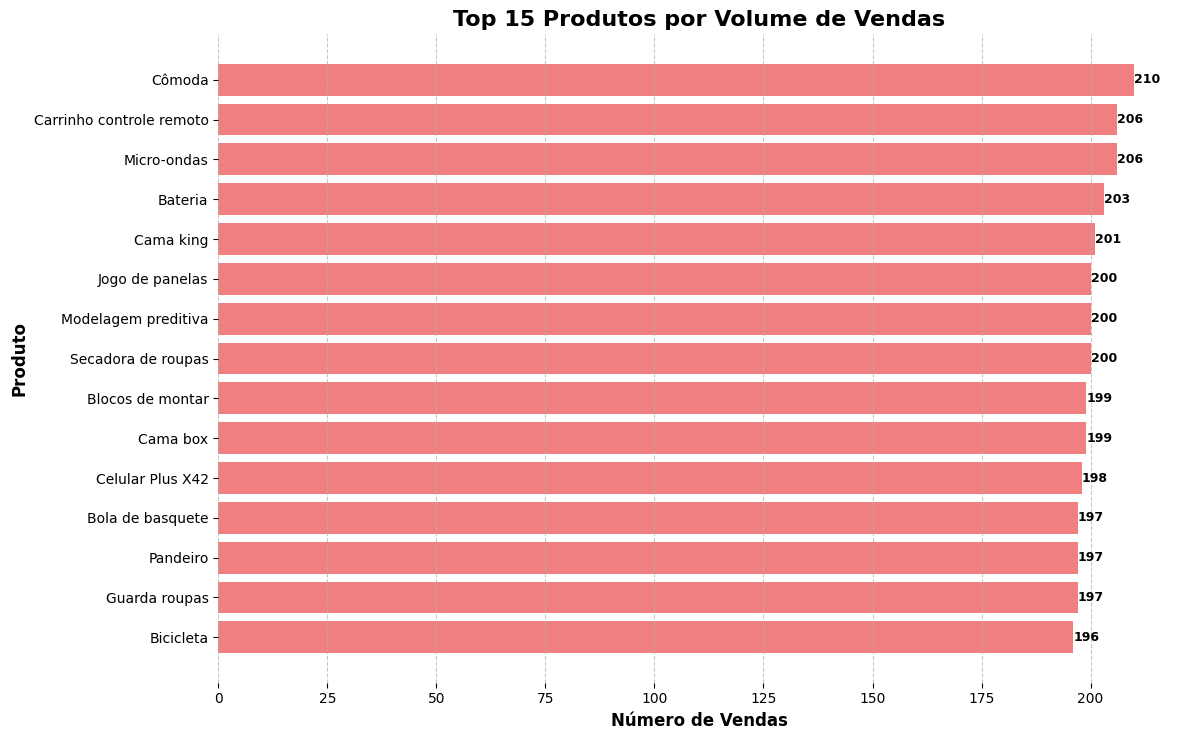


--- 2.4 Análise de Ticket Médio ---
O ticket médio por transação é: R$ 622,31

--- 2.5 Análise de Produtos de Alto e Baixo Desempenho ---

Top 5 Produtos por Faturamento:
- 'TV Led UHD 4K': Faturamento R$ 576.652,70 (Volume: 187 vendas)
- 'Celular Plus X42': Faturamento R$ 534.735,14 (Volume: 198 vendas)
- 'Geladeira': Faturamento R$ 513.249,34 (Volume: 191 vendas)
- 'Smart TV': Faturamento R$ 386.963,12 (Volume: 192 vendas)
- 'Lavadora de roupas': Faturamento R$ 323.292,37 (Volume: 176 vendas)

Top 5 Produtos de Menor Faturamento:
- 'Cubo mágico 8x8': Faturamento R$ 3.638,68 (Volume: 180 vendas)
- 'Corda de pular': Faturamento R$ 4.090,93 (Volume: 186 vendas)
- 'Dinossauro Rex': Faturamento R$ 4.150,53 (Volume: 175 vendas)
- 'Xadrez de madeira': Faturamento R$ 6.865,90 (Volume: 180 vendas)
- 'Jogo de copos': Faturamento R$ 7.445,28 (Volume: 169 vendas)

Top 5 Produtos por Volume de Vendas:
- 'Cômoda': 210 vendas (Faturamento: R$ 77.892,33)
- 'Carrinho controle remoto': 206 vendas (Fa

In [22]:
import pandas as pd
import csv
import requests
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------


# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# --- Análise de Dados Consolidados (com PANDAS) ---
print("\n--- Carregando e Consolidando Dados de Vendas ---")

todos_dados_vendas = []
# Primeiro, consolide todos os dados de vendas em uma única lista de dicionários
for i, url in enumerate(urls):
    nome_loja = f"Loja {i + 1}"
    print(f"Carregando dados da {nome_loja} (URL: {url})...")
    dados_loja = ler_csv(url)
    if dados_loja:
        # Adiciona uma coluna 'Loja' a cada registro ANTES de consolidar
        for venda in dados_loja:
            venda['Loja'] = nome_loja
        todos_dados_vendas.extend(dados_loja)
    else:
        print(f"Nenhum dado carregado para a {nome_loja}.")
print("---")

if todos_dados_vendas:
    df_vendas = pd.DataFrame(todos_dados_vendas)

    # Convertendo 'Preço' e 'Avaliação da compra' para numérico, tratando erros
    df_vendas['Preço'] = pd.to_numeric(df_vendas['Preço'], errors='coerce')
    df_vendas['Avaliação da compra'] = pd.to_numeric(df_vendas['Avaliação da compra'], errors='coerce')

    # Removendo linhas com valores inválidos que impediriam cálculos
    df_vendas.dropna(subset=['Preço', 'Avaliação da compra'], inplace=True)

    if not df_vendas.empty:
        # --- Análise de Faturamento por Loja ---
        faturamento_por_loja_df = df_vendas.groupby('Loja')['Preço'].sum().reset_index()
        print("\n--- Faturamento por Loja ---")
        for index, row in faturamento_por_loja_df.iterrows():
            print(f"{row['Loja']}: {formatar_moeda_br(row['Preço'])}")

        # --- Análise de Média de Avaliação por Loja ---
        media_avaliacao_por_loja_df = df_vendas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
        print("\n--- Média de Avaliação por Loja ---")
        for index, row in media_avaliacao_por_loja_df.iterrows():
            print(f"{row['Loja']}: {row['Avaliação da compra']:.2f}")

        # --- Geração do Gráfico de Barras de Avaliações por Loja ---
        if not media_avaliacao_por_loja_df.empty:
            plt.figure(figsize=(8, 6))
            plt.bar(media_avaliacao_por_loja_df['Loja'], media_avaliacao_por_loja_df['Avaliação da compra'], color='teal')
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.title('Média de Avaliação por Loja', fontsize=16, fontweight='bold')
            plt.xlabel('Loja', fontsize=12, fontweight='bold')
            plt.ylabel('Média de Avaliação (1-5)', fontsize=12, fontweight='bold')
            plt.ylim(0, 5)
            for x_pos, y_val in enumerate(media_avaliacao_por_loja_df['Avaliação da compra']):
                plt.text(x_pos, y_val, f'{y_val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.savefig('media_avaliacao_por_loja_grafico_pandas.png')
            print(f"\nGráfico 'media_avaliacao_por_loja_grafico_pandas.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de média de avaliação por loja (DataFrame de médias vazio).")

        # --- Análise de Volume de Vendas por Loja (Contagem de Ocorrências) ---
        volume_vendas_por_loja_df = df_vendas.groupby('Loja').size().reset_index(name='Volume de Vendas')
        volume_vendas_por_loja_df.sort_values(by='Volume de Vendas', ascending=False, inplace=True)
        print("\n--- Volume de Vendas por Loja (Contagem de Ocorrências) ---")
        for index, row in volume_vendas_por_loja_df.iterrows():
            print(f"{row['Loja']}: {row['Volume de Vendas']} vendas")

        # --- Geração do Gráfico de Colunas: Volume de Vendas por Loja ---
        if not volume_vendas_por_loja_df.empty:
            plt.figure(figsize=(10, 6))
            plt.bar(volume_vendas_por_loja_df['Loja'], volume_vendas_por_loja_df['Volume de Vendas'], color='darkblue')
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.title('Volume de Vendas por Loja', fontsize=16, fontweight='bold')
            plt.xlabel('Loja', fontsize=12, fontweight='bold')
            plt.ylabel('Número de Vendas', fontsize=12, fontweight='bold')
            for x_pos, y_val in enumerate(volume_vendas_por_loja_df['Volume de Vendas']):
                plt.text(x_pos, y_val, f'{y_val}', ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.savefig('volume_vendas_por_loja_grafico.png')
            print(f"\nGráfico 'volume_vendas_por_loja_grafico.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de volume de vendas por loja (DataFrame de volume vazio).")

        # --- Análise de Volume de Vendas por Categoria (Produto) ---
        volume_vendas_por_produto_df = df_vendas.groupby('Produto').size().reset_index(name='Volume de Vendas')
        volume_vendas_por_produto_df.sort_values(by='Volume de Vendas', ascending=False, inplace=True)
        print("\n--- Volume de Vendas por Categoria (Produto) ---")
        N_PRODUTOS_VOLUME = 15
        for index, row in volume_vendas_por_produto_df.head(N_PRODUTOS_VOLUME).iterrows():
            print(f"Produto: '{row['Produto']}' - {row['Volume de Vendas']} vendas")
        if len(volume_vendas_por_produto_df) > N_PRODUTOS_VOLUME:
            print(f"... e mais {len(volume_vendas_por_produto_df) - N_PRODUTOS_VOLUME} outros produtos.")

        # --- Geração do Gráfico de Barras Horizontais: Volume de Vendas por Categoria (Top N) ---
        if not volume_vendas_por_produto_df.empty:
            top_n_volume_produtos = volume_vendas_por_produto_df.head(N_PRODUTOS_VOLUME)
            plt.figure(figsize=(12, max(6, len(top_n_volume_produtos) * 0.5)))
            plt.barh(top_n_volume_produtos['Produto'], top_n_volume_produtos['Volume de Vendas'], color='lightcoral')
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.title(f'Top {N_PRODUTOS_VOLUME} Produtos por Volume de Vendas', fontsize=16, fontweight='bold')
            plt.xlabel('Número de Vendas', fontsize=12, fontweight='bold')
            plt.ylabel('Produto', fontsize=12, fontweight='bold')
            for i, (volume_val, produto_nome) in enumerate(zip(top_n_volume_produtos['Volume de Vendas'], top_n_volume_produtos['Produto'])):
                plt.text(volume_val, i, f'{volume_val}', ha='left', va='center', fontsize=9, rotation=0, color='black', fontweight='bold')
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.gca().invert_yaxis()
            plt.savefig(f'top_{N_PRODUTOS_VOLUME}_produtos_volume_vendas_grafico.png')
            print(f"\nGráfico 'top_{N_PRODUTOS_VOLUME}_produtos_volume_vendas_grafico.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de volume de vendas por produto (DataFrame de volume vazio).")

        # --- 2.4 Análise de Ticket Médio ---
        print("\n" + "="*50)
        print("--- 2.4 Análise de Ticket Médio ---")
        print("="*50)

        ticket_medio = df_vendas['Preço'].mean()
        print(f"O ticket médio por transação é: {formatar_moeda_br(ticket_medio)}")
        print("="*50)


        # --- 2.5 Análise de Produtos de Alto e Baixo Desempenho ---
        print("\n" + "="*50)
        print("--- 2.5 Análise de Produtos de Alto e Baixo Desempenho ---")
        print("="*50)

        # Re-agrupar para garantir que temos Faturamento e Volume (Contagem) juntos
        desempenho_produtos_df = df_vendas.groupby('Produto').agg(
            Faturamento=('Preço', 'sum'),
            Volume_Vendas=('Produto', 'size') # Contagem de ocorrências para o volume
        ).reset_index()

        N_DESTAQUE = 5 # Quantos produtos destacar (Top/Bottom)

        # Produtos de Alto Desempenho (Faturamento)
        produtos_alto_faturamento = desempenho_produtos_df.sort_values(by='Faturamento', ascending=False).head(N_DESTAQUE)
        print(f"\nTop {N_DESTAQUE} Produtos por Faturamento:")
        for index, row in produtos_alto_faturamento.iterrows():
            print(f"- '{row['Produto']}': Faturamento {formatar_moeda_br(row['Faturamento'])} (Volume: {row['Volume_Vendas']} vendas)")

        # Produtos de Baixo Desempenho (Faturamento)
        produtos_baixo_faturamento = desempenho_produtos_df.sort_values(by='Faturamento', ascending=True).head(N_DESTAQUE)
        print(f"\nTop {N_DESTAQUE} Produtos de Menor Faturamento:")
        for index, row in produtos_baixo_faturamento.iterrows():
            print(f"- '{row['Produto']}': Faturamento {formatar_moeda_br(row['Faturamento'])} (Volume: {row['Volume_Vendas']} vendas)")

        # Produtos de Alto Desempenho (Volume de Vendas)
        produtos_alto_volume = desempenho_produtos_df.sort_values(by='Volume_Vendas', ascending=False).head(N_DESTAQUE)
        print(f"\nTop {N_DESTAQUE} Produtos por Volume de Vendas:")
        for index, row in produtos_alto_volume.iterrows():
            print(f"- '{row['Produto']}': {row['Volume_Vendas']} vendas (Faturamento: {formatar_moeda_br(row['Faturamento'])})")

        # Produtos de Baixo Desempenho (Volume de Vendas)
        produtos_baixo_volume = desempenho_produtos_df.sort_values(by='Volume_Vendas', ascending=True).head(N_DESTAQUE)
        print(f"\nTop {N_DESTAQUE} Produtos de Menor Volume de Vendas:")
        for index, row in produtos_baixo_volume.iterrows():
            print(f"- '{row['Produto']}': {row['Volume_Vendas']} vendas (Faturamento: {formatar_moeda_br(row['Faturamento'])})")

        print("="*50) # Finaliza o bloco de desempenho de produtos

    else:
        print("DataFrame de vendas vazio após o pré-processamento. Verifique os dados.")
else:
    print("Nenhum dado de venda carregado para análise. Verifique as URLs ou a conexão.")


--- Carregando e Consolidando Dados de Vendas ---
Carregando dados da Loja 1 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)...
Carregando dados da Loja 2 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)...
Carregando dados da Loja 3 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)...
Carregando dados da Loja 4 (URL: https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)...
---

--- Faturamento por Loja ---
Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58

--- Média de Avaliação por Loja ---
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00

Gráfico 'media_avaliacao_por_loja_grafico_pandas.png' gerado com sucesso.

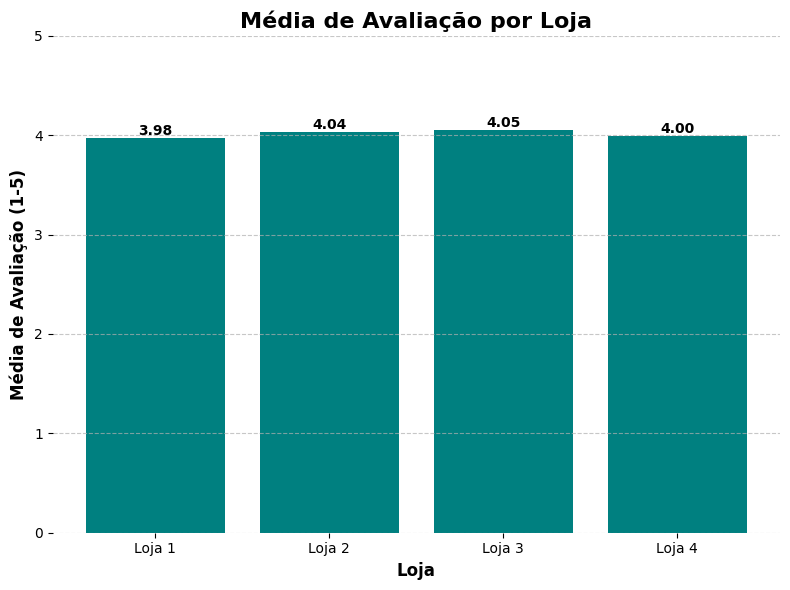


--- Volume de Vendas por Loja (Contagem de Ocorrências) ---
Loja 1: 2359 vendas
Loja 2: 2359 vendas
Loja 3: 2359 vendas
Loja 4: 2358 vendas

Gráfico 'volume_vendas_por_loja_grafico.png' gerado com sucesso.


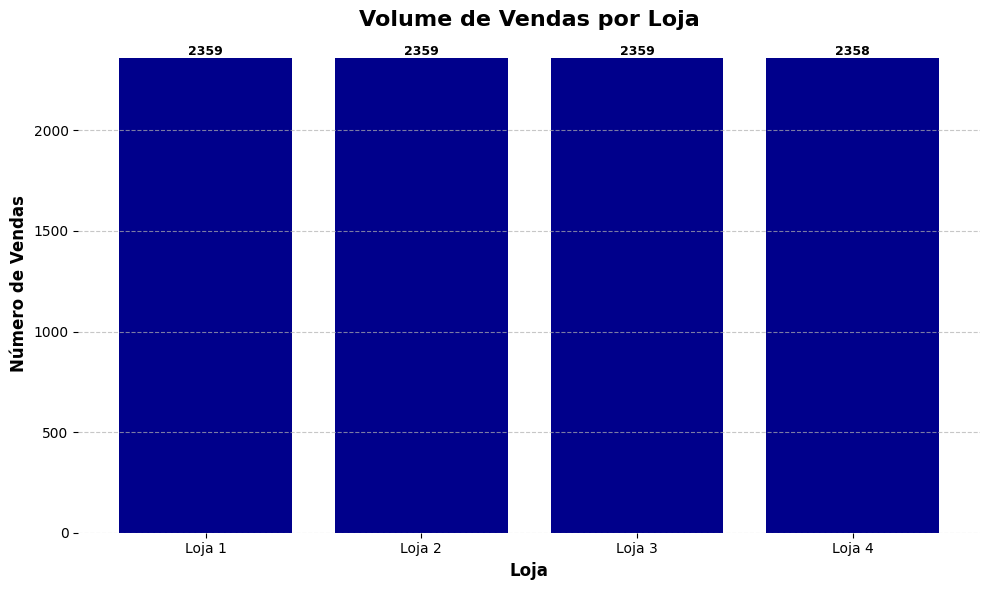


--- Volume de Vendas por Categoria (Produto) ---
Produto: 'Cômoda' - 210 vendas
Produto: 'Carrinho controle remoto' - 206 vendas
Produto: 'Micro-ondas' - 206 vendas
Produto: 'Bateria' - 203 vendas
Produto: 'Cama king' - 201 vendas
Produto: 'Jogo de panelas' - 200 vendas
Produto: 'Modelagem preditiva' - 200 vendas
Produto: 'Secadora de roupas' - 200 vendas
Produto: 'Blocos de montar' - 199 vendas
Produto: 'Cama box' - 199 vendas
Produto: 'Celular Plus X42' - 198 vendas
Produto: 'Bola de basquete' - 197 vendas
Produto: 'Pandeiro' - 197 vendas
Produto: 'Guarda roupas' - 197 vendas
Produto: 'Bicicleta' - 196 vendas
... e mais 36 outros produtos.

Gráfico 'top_15_produtos_volume_vendas_grafico.png' gerado com sucesso.


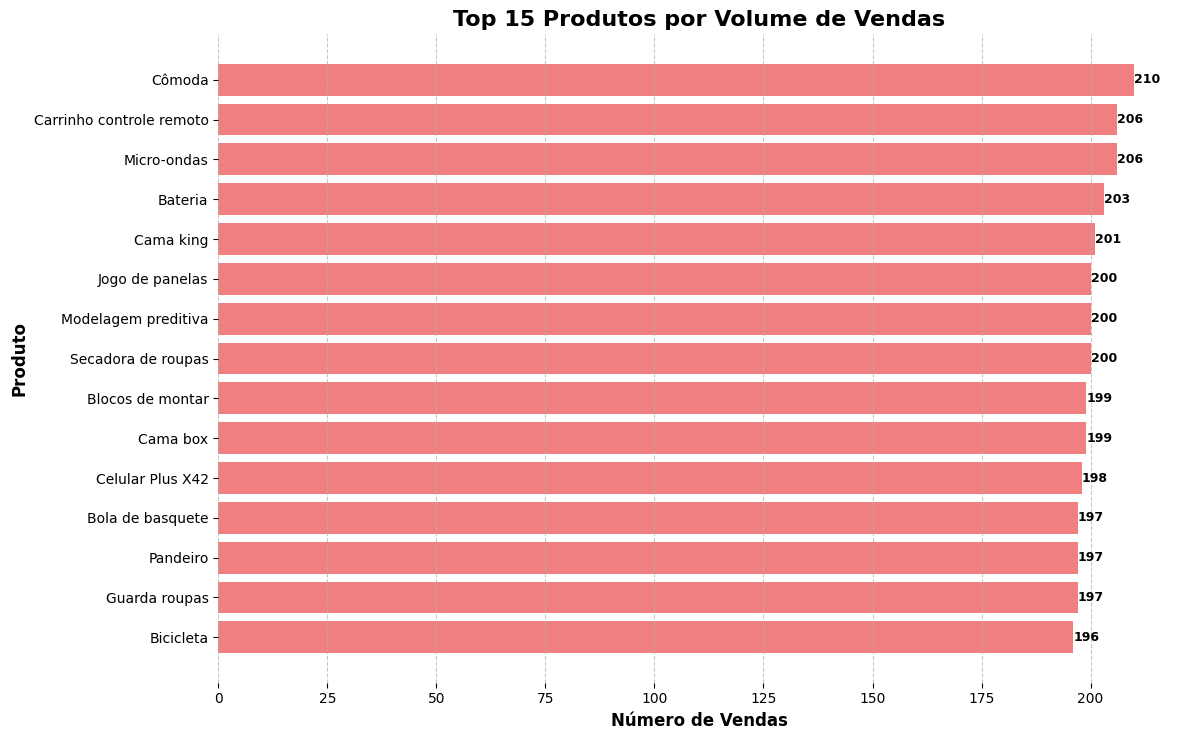


--- 2.4 Análise de Ticket Médio ---
O ticket médio por transação é: R$ 622,31

--- 2.5 Análise de Produtos de Alto e Baixo Desempenho ---

Top 5 Produtos por Faturamento:
- 'TV Led UHD 4K': Faturamento R$ 576.652,70 (Volume: 187 vendas)
- 'Celular Plus X42': Faturamento R$ 534.735,14 (Volume: 198 vendas)
- 'Geladeira': Faturamento R$ 513.249,34 (Volume: 191 vendas)
- 'Smart TV': Faturamento R$ 386.963,12 (Volume: 192 vendas)
- 'Lavadora de roupas': Faturamento R$ 323.292,37 (Volume: 176 vendas)

Top 5 Produtos de Menor Faturamento:
- 'Cubo mágico 8x8': Faturamento R$ 3.638,68 (Volume: 180 vendas)
- 'Corda de pular': Faturamento R$ 4.090,93 (Volume: 186 vendas)
- 'Dinossauro Rex': Faturamento R$ 4.150,53 (Volume: 175 vendas)
- 'Xadrez de madeira': Faturamento R$ 6.865,90 (Volume: 180 vendas)
- 'Jogo de copos': Faturamento R$ 7.445,28 (Volume: 169 vendas)

Top 5 Produtos por Volume de Vendas:
- 'Cômoda': 210 vendas (Faturamento: R$ 77.892,33)
- 'Carrinho controle remoto': 206 vendas (Fa

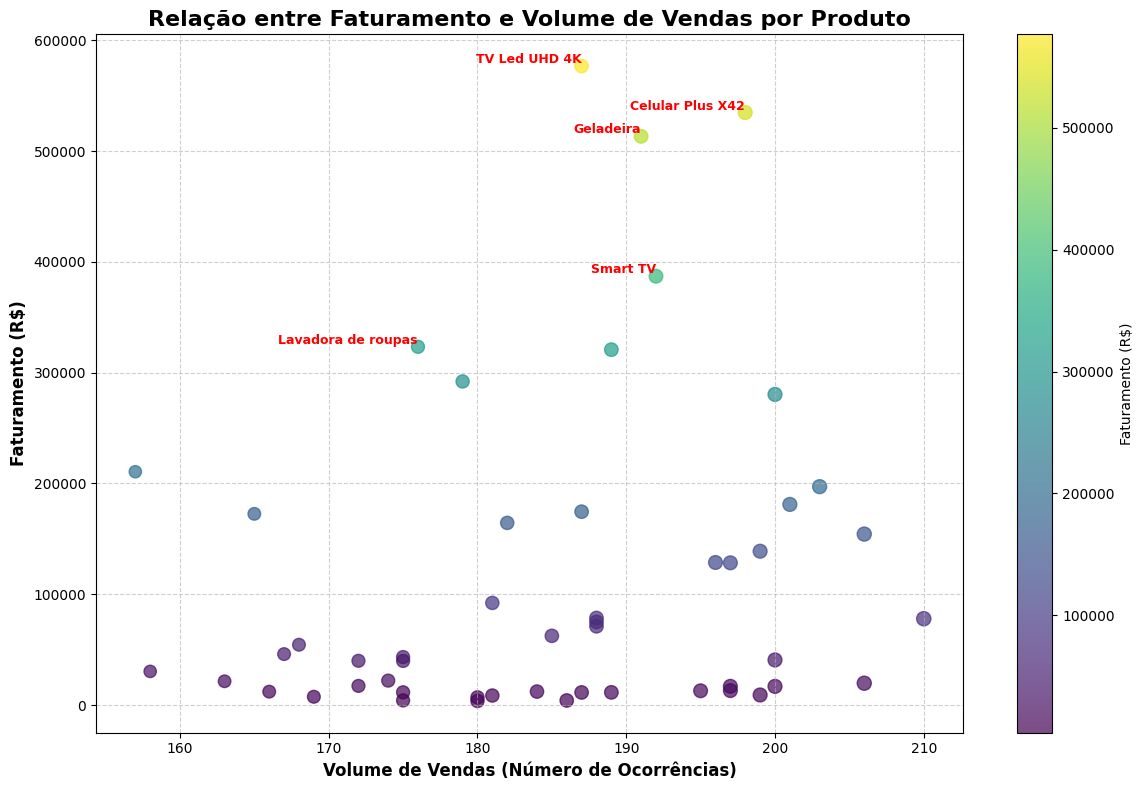

In [24]:
import pandas as pd
import csv
import requests
import matplotlib.pyplot as plt

# --- Função de Formatação de Moeda Personalizada ---
def formatar_moeda_br(valor):
    """Formata um valor numérico para o formato de moeda brasileira (R$ X.XXX.XXX,XX)."""
    valor = float(valor)
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
# --------------------------------------------------------------------------------------


# Define URLs for CSV files
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lendo CSV das URLs usando requests
def ler_csv(url):
    dados = []
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        linhas = response.text.splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao ler o CSV da URL {url} usando requests: {e}")
    except Exception as e:
        print(f"Erro inesperado ao ler o CSV da URL {url}: {e}")
    return dados

# --- Análise de Dados Consolidados (com PANDAS) ---
print("\n--- Carregando e Consolidando Dados de Vendas ---")

todos_dados_vendas = []
# Primeiro, consolide todos os dados de vendas em uma única lista de dicionários
for i, url in enumerate(urls):
    nome_loja = f"Loja {i + 1}"
    print(f"Carregando dados da {nome_loja} (URL: {url})...")
    dados_loja = ler_csv(url)
    if dados_loja:
        # Adiciona uma coluna 'Loja' a cada registro ANTES de consolidar
        for venda in dados_loja:
            venda['Loja'] = nome_loja
        todos_dados_vendas.extend(dados_loja)
    else:
        print(f"Nenhum dado carregado para a {nome_loja}.")
print("---")

if todos_dados_vendas:
    df_vendas = pd.DataFrame(todos_dados_vendas)

    # Convertendo 'Preço' e 'Avaliação da compra' para numérico, tratando erros
    df_vendas['Preço'] = pd.to_numeric(df_vendas['Preço'], errors='coerce')
    df_vendas['Avaliação da compra'] = pd.to_numeric(df_vendas['Avaliação da compra'], errors='coerce')

    # Removendo linhas com valores inválidos que impediriam cálculos
    df_vendas.dropna(subset=['Preço', 'Avaliação da compra'], inplace=True)

    if not df_vendas.empty:
        # --- Análise de Faturamento por Loja ---
        faturamento_por_loja_df = df_vendas.groupby('Loja')['Preço'].sum().reset_index()
        print("\n--- Faturamento por Loja ---")
        for index, row in faturamento_por_loja_df.iterrows():
            print(f"{row['Loja']}: {formatar_moeda_br(row['Preço'])}")

        # --- Análise de Média de Avaliação por Loja ---
        media_avaliacao_por_loja_df = df_vendas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
        print("\n--- Média de Avaliação por Loja ---")
        for index, row in media_avaliacao_por_loja_df.iterrows():
            print(f"{row['Loja']}: {row['Avaliação da compra']:.2f}")

        # --- Geração do Gráfico de Barras de Avaliações por Loja ---
        if not media_avaliacao_por_loja_df.empty:
            plt.figure(figsize=(8, 6))
            plt.bar(media_avaliacao_por_loja_df['Loja'], media_avaliacao_por_loja_df['Avaliação da compra'], color='teal')
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.title('Média de Avaliação por Loja', fontsize=16, fontweight='bold')
            plt.xlabel('Loja', fontsize=12, fontweight='bold')
            plt.ylabel('Média de Avaliação (1-5)', fontsize=12, fontweight='bold')
            plt.ylim(0, 5)
            for x_pos, y_val in enumerate(media_avaliacao_por_loja_df['Avaliação da compra']):
                plt.text(x_pos, y_val, f'{y_val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.savefig('media_avaliacao_por_loja_grafico_pandas.png')
            print(f"\nGráfico 'media_avaliacao_por_loja_grafico_pandas.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de média de avaliação por loja (DataFrame de médias vazio).")

        # --- Análise de Volume de Vendas por Loja (Contagem de Ocorrências) ---
        volume_vendas_por_loja_df = df_vendas.groupby('Loja').size().reset_index(name='Volume de Vendas')
        volume_vendas_por_loja_df.sort_values(by='Volume de Vendas', ascending=False, inplace=True)
        print("\n--- Volume de Vendas por Loja (Contagem de Ocorrências) ---")
        for index, row in volume_vendas_por_loja_df.iterrows():
            print(f"{row['Loja']}: {row['Volume de Vendas']} vendas")

        # --- Geração do Gráfico de Colunas: Volume de Vendas por Loja ---
        if not volume_vendas_por_loja_df.empty:
            plt.figure(figsize=(10, 6))
            plt.bar(volume_vendas_por_loja_df['Loja'], volume_vendas_por_loja_df['Volume de Vendas'], color='darkblue')
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.title('Volume de Vendas por Loja', fontsize=16, fontweight='bold')
            plt.xlabel('Loja', fontsize=12, fontweight='bold')
            plt.ylabel('Número de Vendas', fontsize=12, fontweight='bold')
            for x_pos, y_val in enumerate(volume_vendas_por_loja_df['Volume de Vendas']):
                plt.text(x_pos, y_val, f'{y_val}', ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.savefig('volume_vendas_por_loja_grafico.png')
            print(f"\nGráfico 'volume_vendas_por_loja_grafico.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de volume de vendas por loja (DataFrame de volume vazio).")

        # --- Análise de Volume de Vendas por Categoria (Produto) ---
        volume_vendas_por_produto_df = df_vendas.groupby('Produto').size().reset_index(name='Volume de Vendas')
        volume_vendas_por_produto_df.sort_values(by='Volume de Vendas', ascending=False, inplace=True)
        print("\n--- Volume de Vendas por Categoria (Produto) ---")
        N_PRODUTOS_VOLUME = 15
        for index, row in volume_vendas_por_produto_df.head(N_PRODUTOS_VOLUME).iterrows():
            print(f"Produto: '{row['Produto']}' - {row['Volume de Vendas']} vendas")
        if len(volume_vendas_por_produto_df) > N_PRODUTOS_VOLUME:
            print(f"... e mais {len(volume_vendas_por_produto_df) - N_PRODUTOS_VOLUME} outros produtos.")

        # --- Geração do Gráfico de Barras Horizontais: Volume de Vendas por Categoria (Top N) ---
        if not volume_vendas_por_produto_df.empty:
            top_n_volume_produtos = volume_vendas_por_produto_df.head(N_PRODUTOS_VOLUME)
            plt.figure(figsize=(12, max(6, len(top_n_volume_produtos) * 0.5)))
            plt.barh(top_n_volume_produtos['Produto'], top_n_volume_produtos['Volume de Vendas'], color='lightcoral')
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            plt.title(f'Top {N_PRODUTOS_VOLUME} Produtos por Volume de Vendas', fontsize=16, fontweight='bold')
            plt.xlabel('Número de Vendas', fontsize=12, fontweight='bold')
            plt.ylabel('Produto', fontsize=12, fontweight='bold')
            for i, (volume_val, produto_nome) in enumerate(zip(top_n_volume_produtos['Volume de Vendas'], top_n_volume_produtos['Produto'])):
                plt.text(volume_val, i, f'{volume_val}', ha='left', va='center', fontsize=9, rotation=0, color='black', fontweight='bold')
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.gca().invert_yaxis()
            plt.savefig(f'top_{N_PRODUTOS_VOLUME}_produtos_volume_vendas_grafico.png')
            print(f"\nGráfico 'top_{N_PRODUTOS_VOLUME}_produtos_volume_vendas_grafico.png' gerado com sucesso.")
            plt.show()
        else:
            print("\nNão foi possível gerar o gráfico de volume de vendas por produto (DataFrame de volume vazio).")

        # --- 2.4 Análise de Ticket Médio ---
        print("\n" + "="*50)
        print("--- 2.4 Análise de Ticket Médio ---")
        print("="*50)

        ticket_medio = df_vendas['Preço'].mean()
        print(f"O ticket médio por transação é: {formatar_moeda_br(ticket_medio)}")
        print("="*50)


        # --- 2.5 Análise de Produtos de Alto e Baixo Desempenho ---
        print("\n" + "="*50)
        print("--- 2.5 Análise de Produtos de Alto e Baixo Desempenho ---")
        print("="*50)

        # Re-agrupar para garantir que temos Faturamento e Volume (Contagem) juntos
        desempenho_produtos_df = df_vendas.groupby('Produto').agg(
            Faturamento=('Preço', 'sum'),
            Volume_Vendas=('Produto', 'size') # Contagem de ocorrências para o volume
        ).reset_index()

        N_DESTAQUE = 5 # Quantos produtos destacar (Top/Bottom)

        # Produtos de Alto Desempenho (Faturamento)
        produtos_alto_faturamento = desempenho_produtos_df.sort_values(by='Faturamento', ascending=False).head(N_DESTAQUE)
        print(f"\nTop {N_DESTAQUE} Produtos por Faturamento:")
        for index, row in produtos_alto_faturamento.iterrows():
            print(f"- '{row['Produto']}': Faturamento {formatar_moeda_br(row['Faturamento'])} (Volume: {row['Volume_Vendas']} vendas)")

        # Produtos de Baixo Desempenho (Faturamento)
        produtos_baixo_faturamento = desempenho_produtos_df.sort_values(by='Faturamento', ascending=True).head(N_DESTAQUE)
        print(f"\nTop {N_DESTAQUE} Produtos de Menor Faturamento:")
        for index, row in produtos_baixo_faturamento.iterrows():
            print(f"- '{row['Produto']}': Faturamento {formatar_moeda_br(row['Faturamento'])} (Volume: {row['Volume_Vendas']} vendas)")

        # Produtos de Alto Desempenho (Volume de Vendas)
        produtos_alto_volume = desempenho_produtos_df.sort_values(by='Volume_Vendas', ascending=False).head(N_DESTAQUE)
        print(f"\nTop {N_DESTAQUE} Produtos por Volume de Vendas:")
        for index, row in produtos_alto_volume.iterrows():
            print(f"- '{row['Produto']}': {row['Volume_Vendas']} vendas (Faturamento: {formatar_moeda_br(row['Faturamento'])})")

        # Produtos de Baixo Desempenho (Volume de Vendas)
        produtos_baixo_volume = desempenho_produtos_df.sort_values(by='Volume_Vendas', ascending=True).head(N_DESTAQUE)
        print(f"\nTop {N_DESTAQUE} Produtos de Menor Volume de Vendas:")
        for index, row in produtos_baixo_volume.iterrows():
            print(f"- '{row['Produto']}': {row['Volume_Vendas']} vendas (Faturamento: {formatar_moeda_br(row['Faturamento'])})")

        print("="*50) # Finaliza o bloco de desempenho de produtos

        # --- ADIÇÃO: Gráfico de Dispersão (Scatter Plot) para Desempenho de Produtos ---
        print("\n--- Visualização: Faturamento vs. Volume de Vendas por Produto ---")

        plt.figure(figsize=(12, 8))
        # Criando o scatter plot
        # Eixo X: Volume de Vendas
        # Eixo Y: Faturamento
        # c=desempenho_produtos_df['Media_Avaliacao'] (se você tivesse a média de avaliação no df)
        # s=desempenho_produtos_df['Volume_Vendas']*5 (ajuste o tamanho do ponto pelo volume, opcional)
        scatter = plt.scatter(desempenho_produtos_df['Volume_Vendas'],
                              desempenho_produtos_df['Faturamento'],
                              s=desempenho_produtos_df['Volume_Vendas'] * 0.5, # Tamanho do ponto proporcional ao volume
                              alpha=0.7, # Transparência dos pontos
                              c=desempenho_produtos_df['Faturamento'], # Cor baseada no faturamento
                              cmap='viridis') # Mapa de cores (verde para roxo)

        # Adicionando rótulos para alguns produtos de destaque (opcional, para evitar poluir)
        # Por exemplo, rotular os 5 maiores em faturamento
        # Itera sobre os produtos já ordenados por faturamento (produtos_alto_faturamento)
        for index, row in produtos_alto_faturamento.iterrows():
            plt.text(row['Volume_Vendas'], row['Faturamento'], row['Produto'],
                     fontsize=9, ha='right', va='bottom', fontweight='bold', color='red')

        # Títulos e rótulos
        plt.title('Relação entre Faturamento e Volume de Vendas por Produto', fontsize=16, fontweight='bold')
        plt.xlabel('Volume de Vendas (Número de Ocorrências)', fontsize=12, fontweight='bold')
        plt.ylabel('Faturamento (R$)', fontsize=12, fontweight='bold')

        plt.grid(True, linestyle='--', alpha=0.6) # Adiciona grade
        plt.tight_layout() # Ajusta o layout

        # Adicionar barra de cores (colorbar) se estiver usando cores para mapear dados
        plt.colorbar(scatter, label='Faturamento (R$)')

        # Salvar o gráfico
        plt.savefig('faturamento_vs_volume_produtos_scatterplot.png')
        print(f"\nGráfico 'faturamento_vs_volume_produtos_scatterplot.png' gerado com sucesso.")
        plt.show()

        # --- FIM DA ADIÇÃO ---

    else:
        print("DataFrame de vendas vazio após o pré-processamento. Verifique os dados.")
else:
    print("Nenhum dado de venda carregado para análise. Verifique as URLs ou a conexão.")

# 4. Análise temporal:

##4.1. Faturamento Mensal/Trimestral/Anual: **Tendências de vendas ao longo do tempo**

##4.2. Vendas por dia da semana/hora do dia: **identificação de picos de vendas.**

##4.3. Comparativo de períodos: **Desempenho em relação a meses/trimestres/anos anteriores**

# 5. Frete Médio por Loja


##5.1. Custo total de frete: **Qual o valor gasto com fretes em todas as vendas.**

##5.2.Custo médio de frete por venda/produto: **Qual o impacto do frete em cada transação ou item.**

##5.3. Frete por categoria/loja/região: **Existem categorias de produtos, lojas ou regiões específicas que geram custos de frete desproporcionamente altos?**

##5.4. Impacto do frete no faturamento líquido: **como o custo do frete afeta a margem de lucro.**